In [1]:
import warnings
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style
%matplotlib inline
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

import sklearn
import statsmodels
import statsmodels.api as sm

**Read the data from the '.csv' file as a monthly Time Series.**

In [2]:
# creating pandas.df
df = pd.read_csv('Rose.csv')

In [136]:
# First few rows of the dataset
df.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [137]:
# Last few rows of the dataset
df.tail()

YearMonth  Rose
182   1995-03  45.0
183   1995-04  52.0
184   1995-05  28.0
185   1995-06  40.0
186   1995-07  62.0

**Creating the Time Stamps and adding to the data frame to make it a Time Series Data**

In [138]:
Time_Stamp = pd.date_range(start='1/1/1980', periods=len(df), freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [139]:
df['Time_Stamp'] = Time_Stamp
df.head()

YearMonth   Rose Time_Stamp
0   1980-01  112.0 1980-01-31
1   1980-02  118.0 1980-02-29
2   1980-03  129.0 1980-03-31
3   1980-04   99.0 1980-04-30
4   1980-05  116.0 1980-05-31

In [140]:
df.set_index(keys='Time_Stamp',inplace=True)
df

YearMonth   Rose
Time_Stamp                 
1980-01-31   1980-01  112.0
1980-02-29   1980-02  118.0
1980-03-31   1980-03  129.0
1980-04-30   1980-04   99.0
1980-05-31   1980-05  116.0
...              ...    ...
1995-03-31   1995-03   45.0
1995-04-30   1995-04   52.0
1995-05-31   1995-05   28.0
1995-06-30   1995-06   40.0
1995-07-31   1995-07   62.0

[187 rows x 2 columns]

In [141]:
df.drop('YearMonth', axis=1, inplace=True)
df

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1995-03-31   45.0
1995-04-30   52.0
1995-05-31   28.0
1995-06-30   40.0
1995-07-31   62.0

[187 rows x 1 columns]

**Check the basic measures of descriptive statistics**

In [142]:
df.describe()

Rose
count  185.000000
mean    90.394595
std     39.175344
min     28.000000
25%     63.000000
50%     86.000000
75%    112.000000
max    267.000000

**Check for missing values**

In [143]:
df.isnull().sum()

Rose    2
dtype: int64

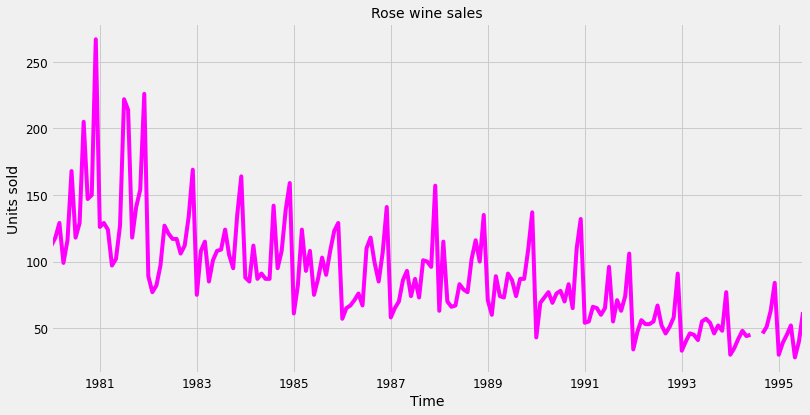

In [144]:
plt.figure(figsize = (12, 6))
df.Rose.plot(color='magenta')
plt.title('Rose wine sales', fontsize=14);
plt.xlabel('Time');
plt.ylabel('Units sold');

Gap in 1994 sales figures. Let us check in which month.

In [145]:
df['1994']

Rose
Time_Stamp      
1994-01-31  30.0
1994-02-28  35.0
1994-03-31  42.0
1994-04-30  48.0
1994-05-31  44.0
1994-06-30  45.0
1994-07-31   NaN
1994-08-31   NaN
1994-09-30  46.0
1994-10-31  51.0
1994-11-30  63.0
1994-12-31  84.0

Since the data has monthly frequency, we can resample at a shorter frequency such as day or daily to get a better predicton. Some of the alias for time series frequency to be used in resample():-

B: Business-day frequency

D: Calendar-day frequency

M: Month-end frequency

MS: Month-start frequency

Q: Quarter-end frequency

QS: Quarter-start frequency

H: Hourly frequency

A: Year-end frequency

http://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases

In [146]:
df.converted  = df.Rose
ts = df.converted.resample('D').mean() 
df.Rose = ts.interpolate(method = 'linear')
df.Rose['1994']

Time_Stamp
1994-01-31    30.000000
1994-02-28    35.000000
1994-03-31    42.000000
1994-04-30    48.000000
1994-05-31    44.000000
1994-06-30    45.000000
1994-07-31    45.336957
1994-08-31    45.673913
1994-09-30    46.000000
1994-10-31    51.000000
1994-11-30    63.000000
1994-12-31    84.000000
Name: Rose, dtype: float64

In [147]:
df.describe()

Rose
count  187.000000
mean    89.914497
std     39.238259
min     28.000000
25%     62.500000
50%     85.000000
75%    111.000000
max    267.000000

**Plot the Time Series to understand the behaviour of the data.**

In [148]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] =  14,7

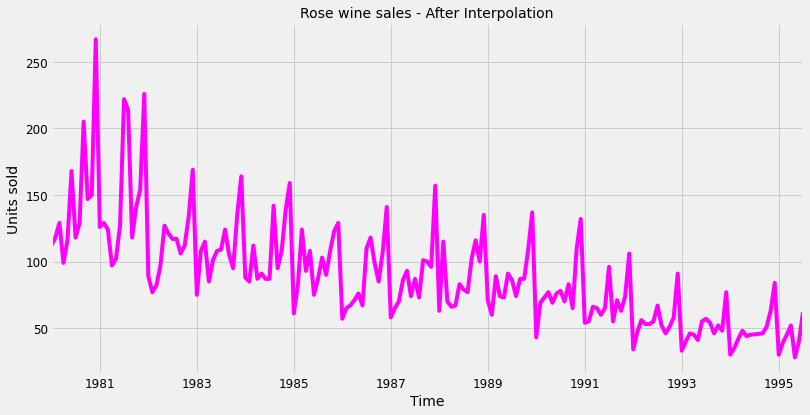

In [149]:
plt.figure(figsize = (12, 6))
df.Rose.plot(color='magenta')
plt.title('Rose wine sales - After Interpolation', fontsize =14)
plt.xlabel('Time')
plt.ylabel('Units sold');

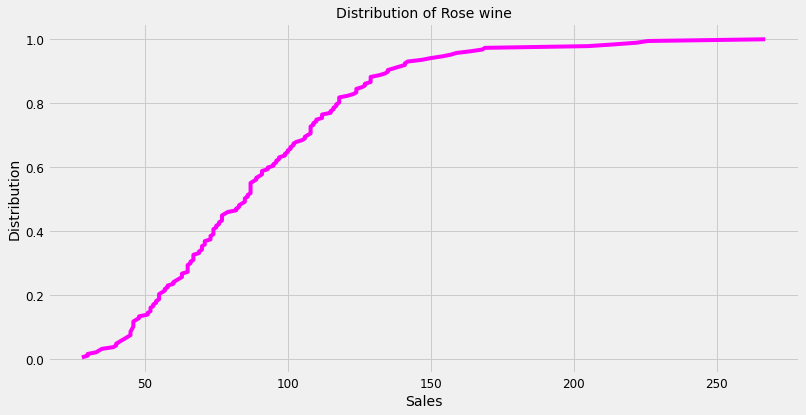

In [150]:
from statsmodels.distributions.empirical_distribution import ECDF
plt.figure(figsize = (12, 6))
cdf = ECDF(df['Rose'])
plt.plot(cdf.x, cdf.y, label = "statmodels", color = 'magenta')
plt.title('Distribution of Rose wine', fontsize=14)
plt.xlabel('Sales')
plt.ylabel('Distribution');

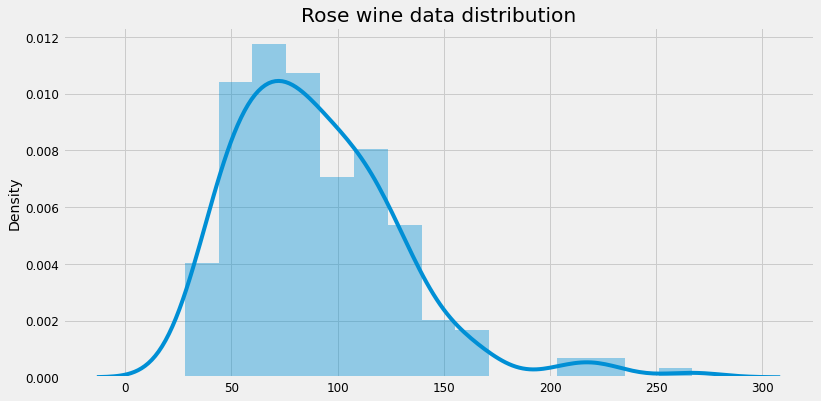

In [151]:
plt.figure(figsize = (12, 6))
sns.distplot(df);
plt.title('Rose wine data distribution');

Data found to be skewed

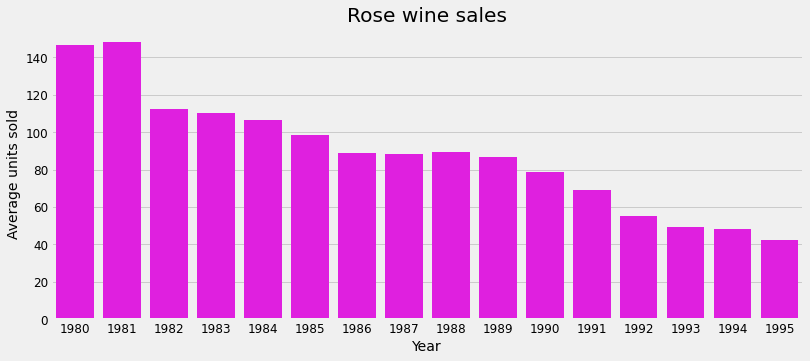

In [152]:
plt.figure(figsize=(12,5))
sns.barplot(df.index.year,df['Rose'], color = 'magenta', ci=None)
plt.xlabel('Year')
plt.ylabel('Average units sold')
plt.title('Rose wine sales')
plt.show();

Best sales were in 1981 with 1980 the next best. Towards the end, there's a period of decline

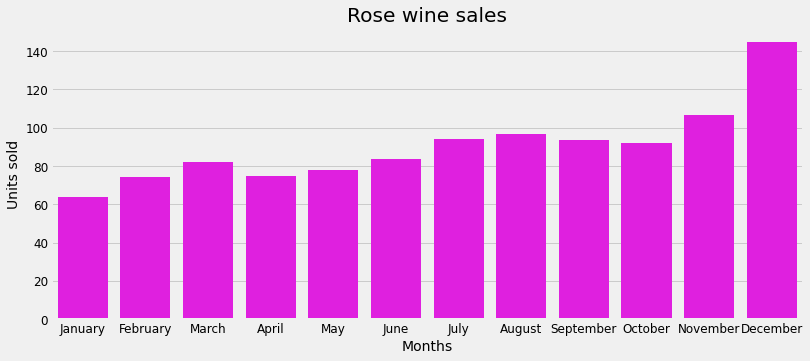

In [153]:
plt.figure(figsize=(12,5))
sns.barplot(df.index.month_name(),df['Rose'], color = 'magenta', ci=None)
plt.xlabel('Months')
plt.ylabel('Units sold')
plt.title('Rose wine sales')
plt.show();

December is the best sales month, the happiest season being November and December

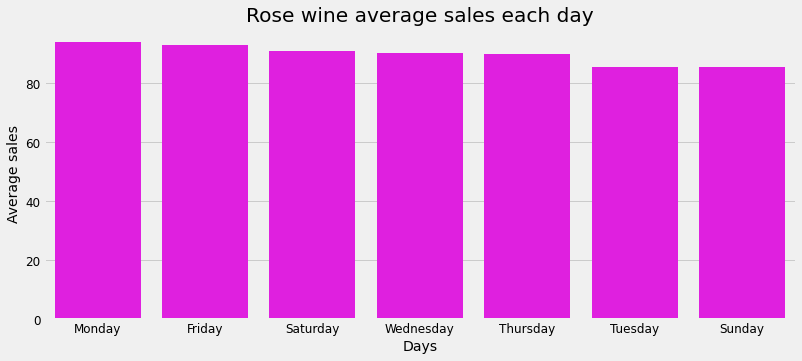

In [154]:
plt.figure(figsize=(12,5))
Tot_mean=df.groupby(df.index.day_name()).mean().reset_index()
Tot_mean=Tot_mean.sort_values(by='Rose',ascending=False)
sns.barplot(Tot_mean['Time_Stamp'],Tot_mean['Rose'], color = 'magenta')
plt.xlabel('Days')
plt.ylabel('Average sales')
plt.title('Rose wine average sales each day')
plt.show();

Mondays and Fridays are best part, although the entire week is not much different

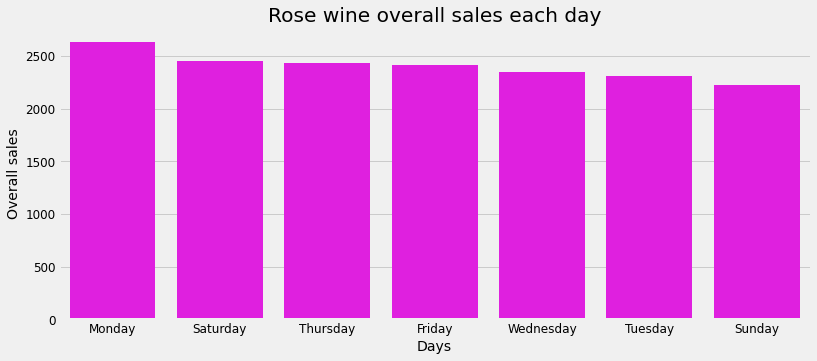

In [155]:
plt.figure(figsize=(12,5))
Tot_sum=df.groupby(df.index.day_name()).sum().reset_index()
Tot_sum=Tot_sum.sort_values(by='Rose',ascending=False)
sns.barplot(Tot_sum['Time_Stamp'],Tot_sum['Rose'], color = 'magenta')
plt.xlabel('Days')
plt.ylabel('Overall sales')
plt.title('Rose wine overall sales each day')
plt.show();

Mondays and Saturdays sold the most Rose wines overall

**Make a boxplot to understand the spread of wine sales across different years and within different months across years.**

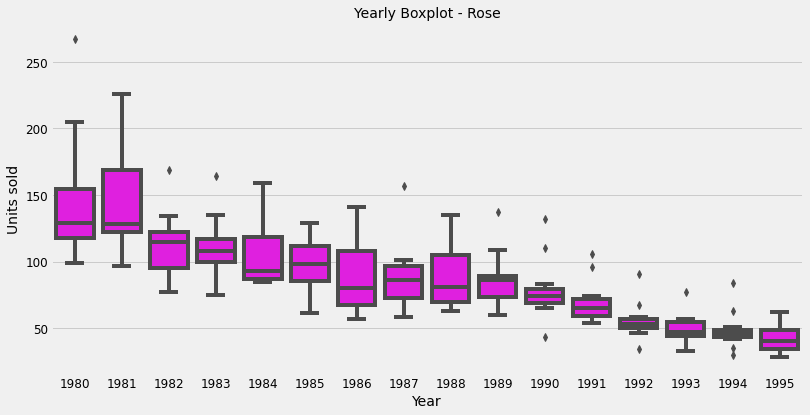

In [156]:
#Yearly boxplot

plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.year,y = df['Rose'], color='magenta')
plt.title('Yearly Boxplot - Rose', fontsize=14);
plt.xlabel('Year')
plt.ylabel('Units sold');

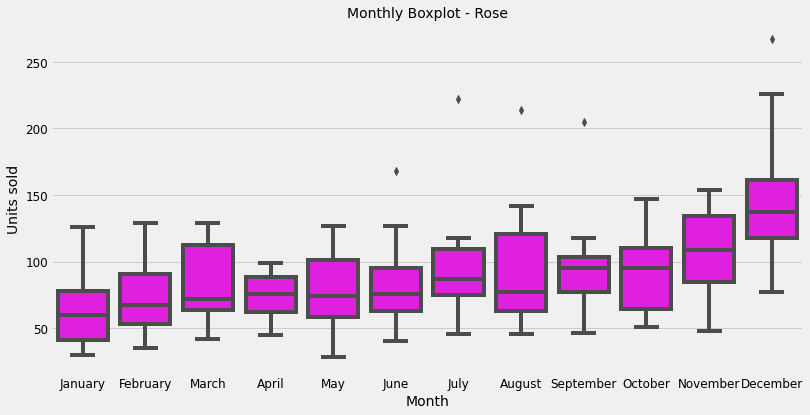

In [157]:
# Monthly boxplot

plt.figure(figsize = (12, 6))
sns.boxplot(x = df.index.month_name(),y = df['Rose'], color='magenta')
plt.title('Monthly Boxplot - Rose', fontsize=14);
plt.xlabel('Month')
plt.ylabel('Units sold');

**Plot a time series monthplot to understand the spread of sales across different years and within different months across years.**

<Figure size 864x432 with 0 Axes>

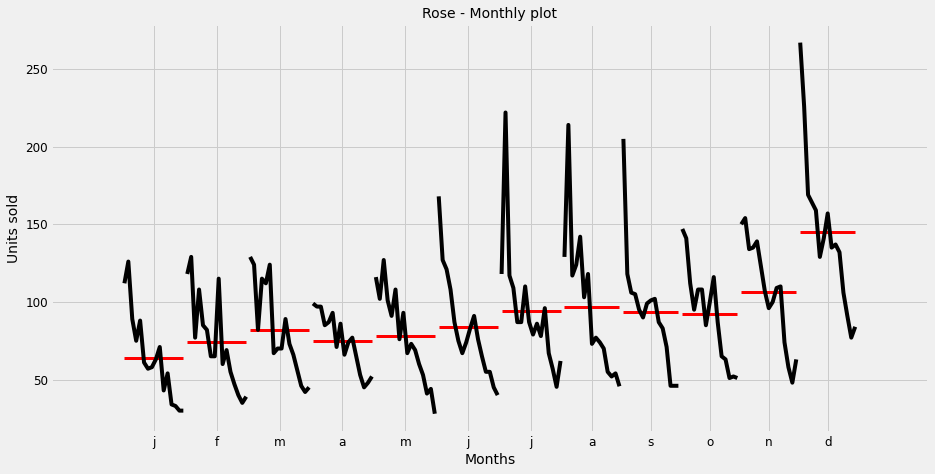

In [158]:
from statsmodels.graphics.tsaplots import month_plot

plt.figure(figsize = (12, 6))
month_plot(df['Rose'])
plt.title('Rose - Monthly plot', fontsize = 14)
plt.xlabel('Months')
plt.ylabel('Units sold');

This plot shows us the behaviour of the Time Series across various months. The red line is the median value.

**Plot a graph of monthly sales across years.**

In [159]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Rose', columns = df.index.month.rename('Months'), index = df.index.year.rename('Years'))
monthly_sales_across_years

Months     1      2      3     4   ...     9      10     11     12
Years                              ...                            
1980    112.0  118.0  129.0  99.0  ...  205.0  147.0  150.0  267.0
1981    126.0  129.0  124.0  97.0  ...  118.0  141.0  154.0  226.0
1982     89.0   77.0   82.0  97.0  ...  106.0  112.0  134.0  169.0
1983     75.0  108.0  115.0  85.0  ...  105.0   95.0  135.0  164.0
1984     88.0   85.0  112.0  87.0  ...   95.0  108.0  139.0  159.0
1985     61.0   82.0  124.0  93.0  ...   90.0  108.0  123.0  129.0
1986     57.0   65.0   67.0  71.0  ...   99.0   85.0  107.0  141.0
1987     58.0   65.0   70.0  86.0  ...  101.0  100.0   96.0  157.0
1988     63.0  115.0   70.0  66.0  ...  102.0  116.0  100.0  135.0
1989     71.0   60.0   89.0  74.0  ...   87.0   87.0  109.0  137.0
1990     43.0   69.0   73.0  77.0  ...   83.0   65.0  110.0  132.0
1991     54.0   55.0   66.0  65.0  ...   71.0   63.0   74.0  106.0
1992     34.0   47.0   56.0  53.0  ...   46.0   51.0   58.0   91.0
1993     33.0   40.0   46.0  45.0  ...   46.0   52.0   48.0   77.0
1994     30.0   35.0   42.0  48.0  ...   46.0   51.0   63.0   84.0
1995     30.0   39.0   45.0  52.0  ...    NaN    NaN    NaN    NaN

[16 rows x 12 columns]

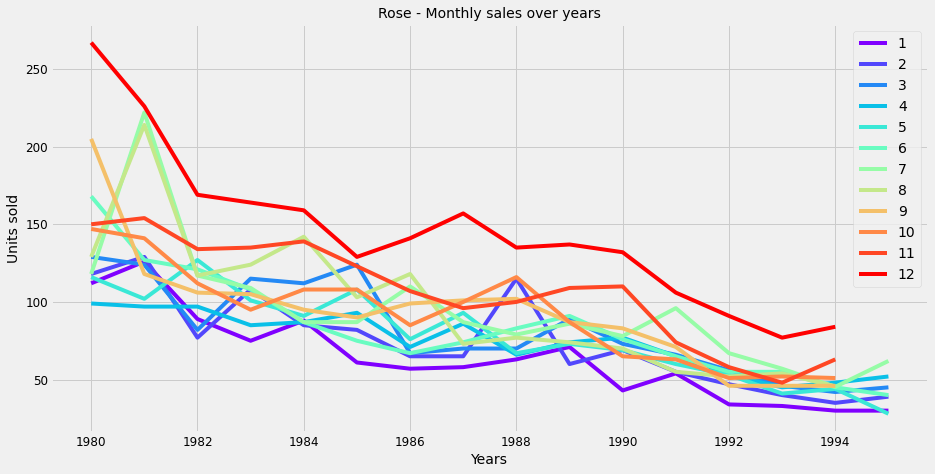

In [160]:
monthly_sales_across_years.plot(colormap='rainbow')
plt.legend(loc='best')
plt.ylabel('Units sold')
plt.xlabel('Years')
plt.title('Rose - Monthly sales over years', fontsize=14);

**Plot the average sales per month and the month on month percentage change of sales.**

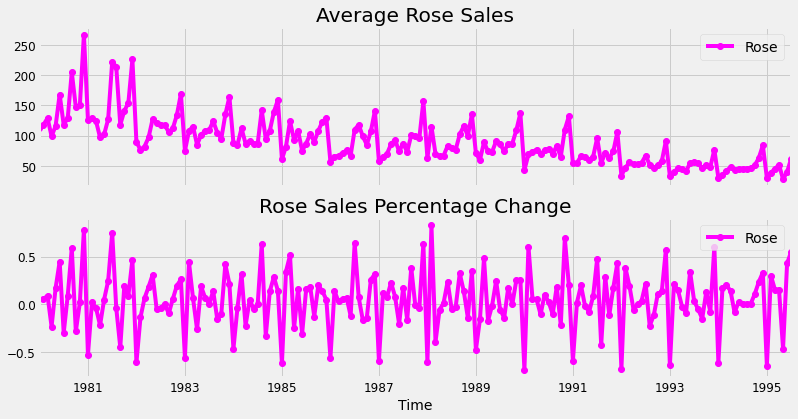

In [161]:
# group by date and get average Rose sales with precentage change
average_r    = df.groupby(df.index)['Rose'].mean()
pct_change_r = df.groupby(df.index)['Rose'].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(12,6))

# plot average Rose sales over time(year-month)
ax2 = average_r.plot(legend=True,ax=axis1,marker='o',title="Average Rose Sales", color = 'magenta')
# plot precent change for Sales over time(year-month)
ax3 = pct_change_r.plot(legend=True,ax=axis2,marker='o',color='magenta',title="Rose Sales Percentage Change")
plt.xlabel('Time')
plt.legend(loc='best');

**Decompose the Time Series and plot the different components.**

If the seasonality and residual components are independent of the trend, then you have an additive series. If the seasonality and residual components are in fact dependent, meaning they fluctuate on trend, then you have a multiplicative series.

In [162]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Additive Decomposition**

Rose additive decomposition


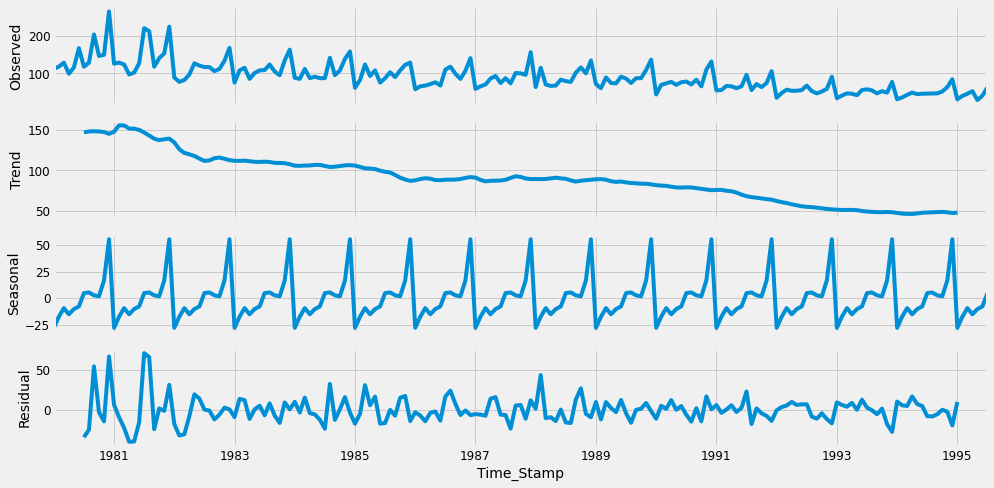

In [163]:
print('Rose additive decomposition');
decomposition = seasonal_decompose(df['Rose'],model='additive')
decomposition.plot();

In [164]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: Rose, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31   -27.908708
1980-02-29   -17.435675
1980-03-31    -9.285895
1980-04-30   -15.098395
1980-05-31   -10.196609
1980-06-30    -7.678752
1980-07-31     4.897089
1980-08-31     5.500109
1980-09-30     2.774625
1980-10-31     1.871848
1980-11-30    16.846848
1980-12-31    55.713514
Name: Rose, dtype: float64 

Residual 
 Time_Stamp
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -33.980423
1980-08-31   -24.625109
1980-09-30    53.850375
1980-10-31    -2.955181
1980-11-30   -14.263514
1980-12-31    66.161486


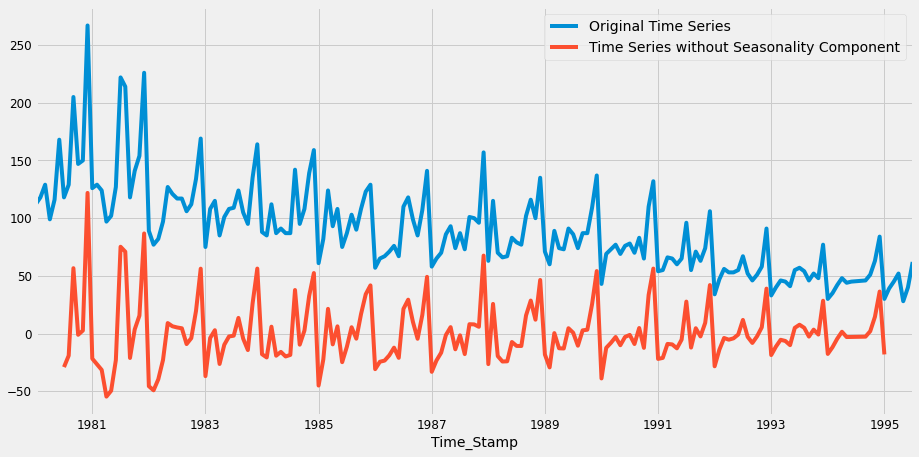

In [165]:
detrend_ts = seasonality + residual
df.Rose.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

**Multiplicative Decomposition**

Rose multiplicative decomposition


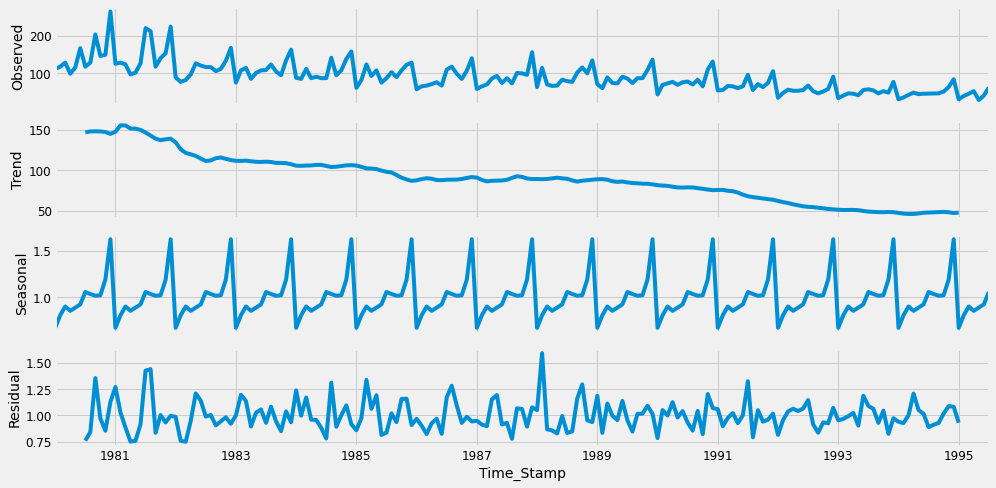

In [166]:
print('Rose multiplicative decomposition')
decomposition = seasonal_decompose(df['Rose'],model='multiplicative')
decomposition.plot();

In [167]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n');

Trend 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: Rose, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.670111
1980-02-29    0.806163
1980-03-31    0.901163
1980-04-30    0.854023
1980-05-31    0.889414
1980-06-30    0.923984
1980-07-31    1.058042
1980-08-31    1.035890
1980-09-30    1.017647
1980-10-31    1.022572
1980-11-30    1.192347
1980-12-31    1.628644
Name: Rose, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.758256
1980-08-31    0.840713
1980-09-30    1.357675
1980-10-31    0.970772
1980-11-30    0.853379
1980-12-31    1.129647
Name: Rose, dtype: float

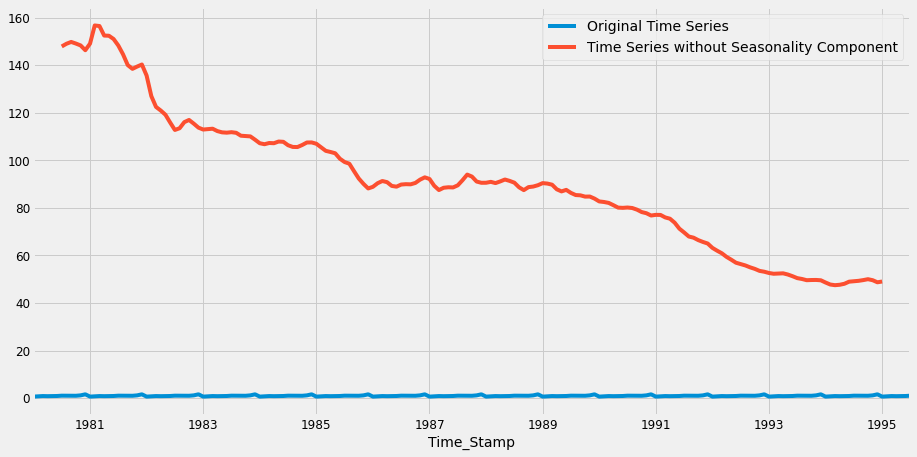

In [168]:
detrend_ts = trend + residual
#df.Rose.plot()
seasonality.plot()
detrend_ts.plot()
plt.legend(["Original Time Series", "Time Series without Seasonality Component"]);

**Split the time series**

In [169]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [170]:
from IPython.display import display

In [171]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
Time_Stamp       
1990-08-31   70.0
1990-09-30   83.0
1990-10-31   65.0
1990-11-30  110.0
1990-12-31  132.0

First few rows of Test Data


Rose
Time_Stamp      
1991-01-31  54.0
1991-02-28  55.0
1991-03-31  66.0
1991-04-30  65.0
1991-05-31  60.0

Last few rows of Test Data


Rose
Time_Stamp      
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [172]:
print(train.shape)
print(test.shape)

(132, 1)
(55, 1)


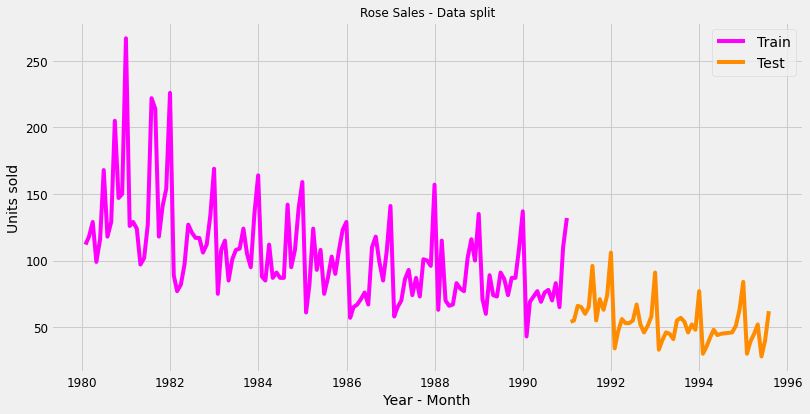

In [173]:
plt.figure(figsize = (12, 6))
plt.plot(train['Rose'], label = 'Train', color='magenta')
plt.plot(test['Rose'], label = 'Test', color='darkorange')
plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose Sales - Data split', fontsize = 12)
plt.show;

**Model 1: Linear Regression**

In [174]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [175]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [176]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
              Rose  time
Time_Stamp             
1980-01-31  112.0     1
1980-02-29  118.0     2
1980-03-31  129.0     3
1980-04-30   99.0     4
1980-05-31  116.0     5 

Last few rows of Training Data 
              Rose  time
Time_Stamp             
1990-08-31   70.0   128
1990-09-30   83.0   129
1990-10-31   65.0   130
1990-11-30  110.0   131
1990-12-31  132.0   132 

First few rows of Test Data 
             Rose  time
Time_Stamp            
1991-01-31  54.0   133
1991-02-28  55.0   134
1991-03-31  66.0   135
1991-04-30  65.0   136
1991-05-31  60.0   137 

Last few rows of Test Data 
             Rose  time
Time_Stamp            
1995-03-31  45.0   183
1995-04-30  52.0   184
1995-05-31  28.0   185
1995-06-30  40.0   186
1995-07-31  62.0   187 



In [177]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Rose'].values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [178]:
LinearRegression_train['RegOnTime_rose']        = lr.predict(LinearRegression_train[['time']])
LinearRegression_test['RegOnTime_rose']         = lr.predict(LinearRegression_test[['time']])

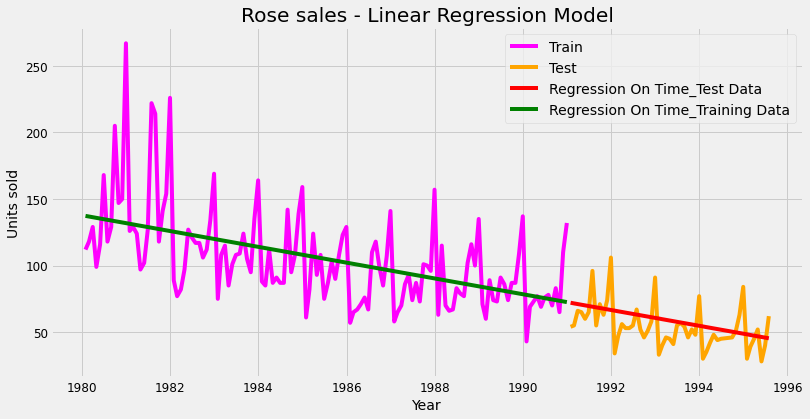

In [179]:
plt.figure(figsize = (12, 6))
plt.plot( train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression On Time_Test Data', color = 'red')
plt.plot(LinearRegression_train['RegOnTime_rose'], label='Regression On Time_Training Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Rose sales - Linear Regression Model');

**Model Evaluation**

In [180]:
from sklearn import metrics
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [181]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model1_train = metrics.mean_squared_error(train['Rose'],LinearRegression_train['RegOnTime_rose'],squared=False)
mape_rose_model1_train = MAPE(train['Rose'],LinearRegression_train['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_train, mape_rose_model1_train))

For RegressionOnTime forecast on the Rose Training Data:  RMSE is 30.718 and MAPE is 21.22


In [182]:
## Rose testing Data - RMSE and MAPE

rmse_rose_model1_test = metrics.mean_squared_error(test['Rose'],LinearRegression_test['RegOnTime_rose'],squared=False)
mape_rose_model1_test = MAPE(test['Rose'],LinearRegression_test['RegOnTime_rose'])
print("For RegressionOnTime forecast on the Rose testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model1_test, mape_rose_model1_test))

For RegressionOnTime forecast on the Rose testing Data:  RMSE is 15.269 and MAPE is 22.82


In [183]:
rose_resultsDf = pd.DataFrame({'Test RMSE': [rmse_rose_model1_test],'Test MAPE': [mape_rose_model1_test]},index=['RegressionOnTime'])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82

**Model 2: Naive forecast**

In [184]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [185]:
NaiveModel_train['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_train['rose_naive'].head()

Time_Stamp
1980-01-31    132.0
1980-02-29    132.0
1980-03-31    132.0
1980-04-30    132.0
1980-05-31    132.0
Name: rose_naive, dtype: float64

In [186]:
NaiveModel_test['rose_naive'] = np.asarray(train['Rose'])[len(np.asarray(train['Rose']))-1]
NaiveModel_test['rose_naive'].head()

Time_Stamp
1991-01-31    132.0
1991-02-28    132.0
1991-03-31    132.0
1991-04-30    132.0
1991-05-31    132.0
Name: rose_naive, dtype: float64

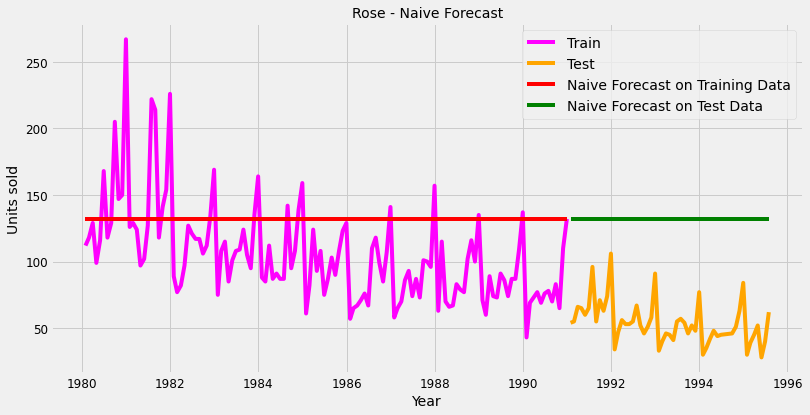

In [187]:
plt.figure(figsize = (12, 6))
plt.plot(NaiveModel_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(NaiveModel_train['rose_naive'], label='Naive Forecast on Training Data', color = 'red')
plt.plot(NaiveModel_test['rose_naive'], label='Naive Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title("Rose - Naive Forecast", fontsize = 14);

**Model Evauation**

In [188]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model2_train = metrics.mean_squared_error(train['Rose'],NaiveModel_train['rose_naive'],squared=False)
mape_rose_model2_train = MAPE(train['Rose'],NaiveModel_train['rose_naive'])
print("For Naive forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_train, mape_rose_model2_train))

For Naive forecast on the Rose Training Data:  RMSE is 45.064 and MAPE is 36.38


In [189]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model2_test = metrics.mean_squared_error(test['Rose'],NaiveModel_test['rose_naive'],squared=False)
mape_rose_model2_test = MAPE(test['Rose'],NaiveModel_test['rose_naive'])
print("For Naive forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model2_test, mape_rose_model2_test))

For Naive forecast on the Rose Testing Data:  RMSE is 79.719 and MAPE is 145.10


In [190]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model2_test],'Test MAPE': [mape_rose_model2_test]},index=['NaiveModel'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10

**Model 3: Simple Average**

In [191]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [192]:
SimpleAverage_train['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_train['rose_mean_forecast'].head()

Time_Stamp
1980-01-31    104.939394
1980-02-29    104.939394
1980-03-31    104.939394
1980-04-30    104.939394
1980-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

In [193]:
SimpleAverage_test['rose_mean_forecast'] = train['Rose'].mean()
SimpleAverage_test['rose_mean_forecast'].head()

Time_Stamp
1991-01-31    104.939394
1991-02-28    104.939394
1991-03-31    104.939394
1991-04-30    104.939394
1991-05-31    104.939394
Name: rose_mean_forecast, dtype: float64

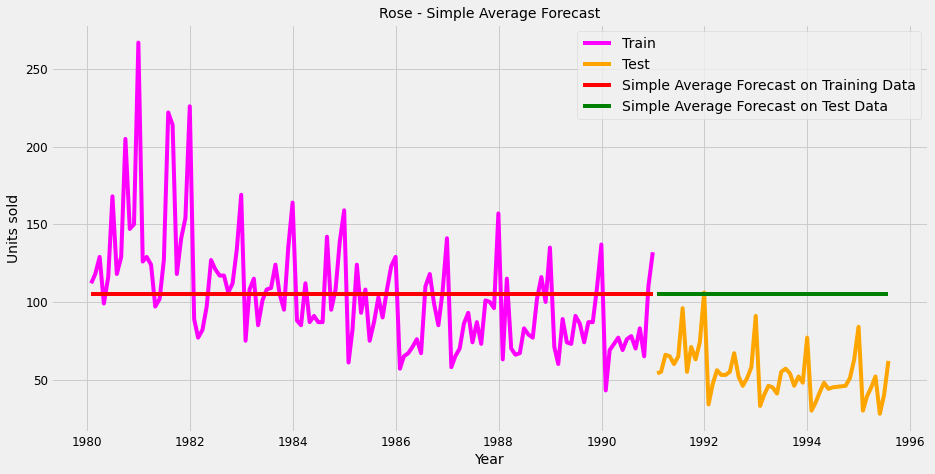

In [194]:
plt.plot(SimpleAverage_train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')
plt.plot(SimpleAverage_train['rose_mean_forecast'], label='Simple Average Forecast on Training Data', color = 'red')
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='Simple Average Forecast on Test Data', color = 'green')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title("Rose - Simple Average Forecast", fontsize=14);

**Model Evaluation**

In [195]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model3_train = metrics.mean_squared_error(train['Rose'],SimpleAverage_train['rose_mean_forecast'],squared=False)
mape_rose_model3_train = MAPE(train['Rose'],SimpleAverage_train['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_train, mape_rose_model3_train))

For Simple Average forecast on the Rose Training Data:  RMSE is 36.034 and MAPE is 25.39


In [196]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model3_test = metrics.mean_squared_error(test['Rose'],SimpleAverage_test['rose_mean_forecast'],squared=False)
mape_rose_model3_test = MAPE(test['Rose'],SimpleAverage_test['rose_mean_forecast'])
print("For Simple Average forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model3_test, mape_rose_model3_test))

For Simple Average forecast on the Rose Testing Data:  RMSE is 53.460 and MAPE is 94.93


In [197]:
resultsDf_2 = pd.DataFrame({'Test RMSE': [rmse_rose_model3_test],'Test MAPE': [mape_rose_model3_test]},index=['SimpleAverage'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93

**Model 4: Moving Average**

In [198]:
MovingAverage = df.copy()
MovingAverage.head()

Rose
Time_Stamp       
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

In [199]:
MovingAverage['Rose_Trailing_2'] = MovingAverage['Rose'].rolling(2).mean()
MovingAverage['Rose_Trailing_4'] = MovingAverage['Rose'].rolling(4).mean()
MovingAverage['Rose_Trailing_6'] = MovingAverage['Rose'].rolling(6).mean()
MovingAverage['Rose_Trailing_9'] = MovingAverage['Rose'].rolling(9).mean()
MovingAverage.head()

Rose  Rose_Trailing_2  ...  Rose_Trailing_6  Rose_Trailing_9
Time_Stamp                          ...                                  
1980-01-31  112.0              NaN  ...              NaN              NaN
1980-02-29  118.0            115.0  ...              NaN              NaN
1980-03-31  129.0            123.5  ...              NaN              NaN
1980-04-30   99.0            114.0  ...              NaN              NaN
1980-05-31  116.0            107.5  ...              NaN              NaN

[5 rows x 5 columns]

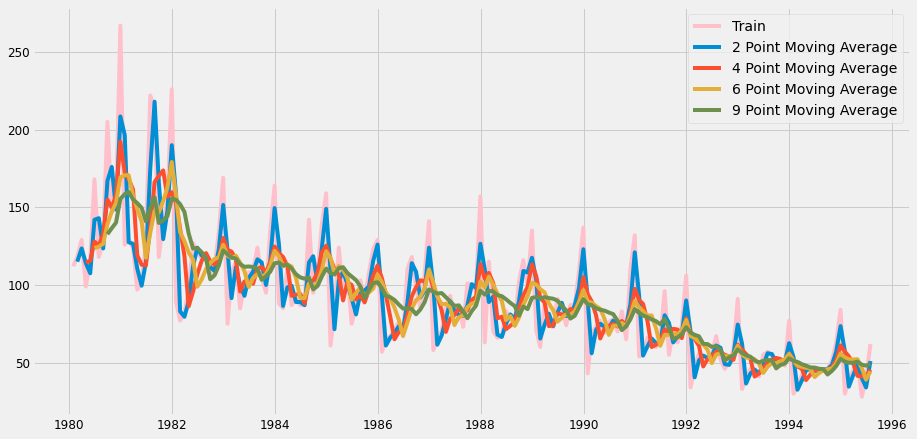

In [200]:
plt.plot(MovingAverage['Rose'], label='Train', color='pink')
plt.plot(MovingAverage['Rose_Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Rose_Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best');

In [201]:
#Creating train and test set 
trailing_MovingAverage_train = MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test = MovingAverage[MovingAverage.index.year >= 1991]

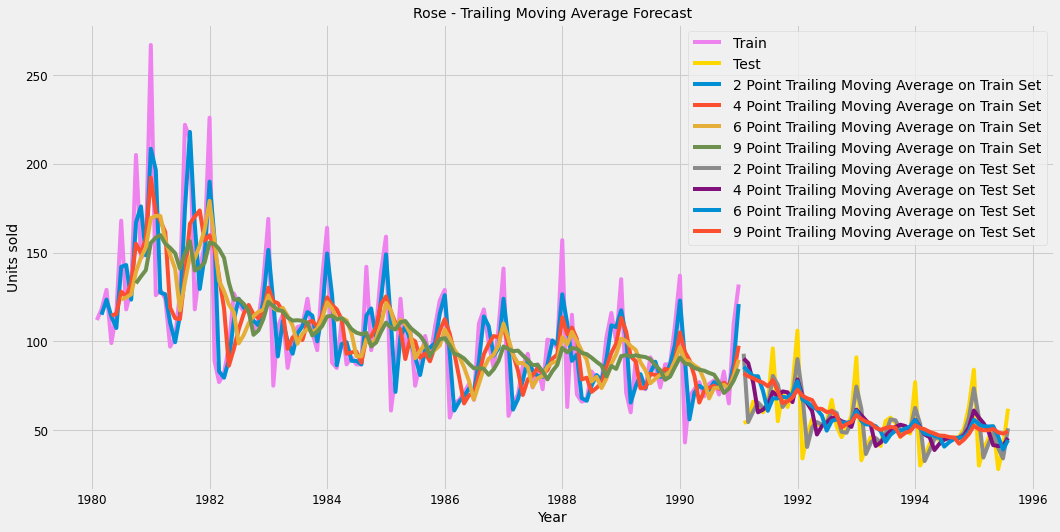

In [202]:
## Plotting on both the Training and Test data

plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Rose'], label='Train', color = 'violet')
plt.plot(trailing_MovingAverage_test['Rose'], label='Test', color = 'gold')

plt.plot(trailing_MovingAverage_train['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Train Set')
plt.plot(trailing_MovingAverage_train['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Train Set')

plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Rose_Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.xlabel('Year')
plt.ylabel('Units sold')

plt.title("Rose - Trailing Moving Average Forecast", fontsize=14);

In [203]:
## Test Data - rmse_rose and mape_rose --> 2 point rose_Trailing MA

rmse_rose_model4_test_2 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'],squared=False)
mape_rose_model4_test_2 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_2'])
print("For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_2, mape_rose_model4_test_2))

## Test Data - rmse_rose and mape_rose --> 4 point rose_Trailing MA

rmse_rose_model4_test_4 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'],squared=False)
mape_rose_model4_test_4 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_4'])
print("For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_4, mape_rose_model4_test_4))

## Test Data - rmse_rose and mape_rose --> 6 point rose_Trailing MA

rmse_rose_model4_test_6 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'],squared=False)
mape_rose_model4_test_6 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_6'])
print("For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_6, mape_rose_model4_test_6))

## Test Data - rmse_rose and mape_rose --> 9 point rose_Trailing MA

rmse_rose_model4_test_9 = metrics.mean_squared_error(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'],squared=False)
mape_rose_model4_test_9 = MAPE(test['Rose'],trailing_MovingAverage_test['Rose_Trailing_9'])
print("For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is %3.3f mape_rose is %3.2f" %(rmse_rose_model4_test_9, mape_rose_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  rmse_rose is 11.529 mape_rose is 13.54
For 4 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.451 mape_rose is 19.49
For 6 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.566 mape_rose is 20.82
For 9 point Moving Average Model forecast on the Training Data,  rmse_rose is 14.728 mape_rose is 21.01


In [204]:
resultsDf_4 = pd.DataFrame({'Test RMSE': [rmse_rose_model4_test_2,rmse_rose_model4_test_4
                                          ,rmse_rose_model4_test_6,rmse_rose_model4_test_9]
                            ,'Test MAPE': [mape_rose_model4_test_2,mape_rose_model4_test_4,
                                           mape_rose_model4_test_6,mape_rose_model4_test_9]}
                           ,index=['2 point TMA','4 point TMA'
                                   ,'6 point TMA','9 point TMA'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01

**Model 5: Simple Exponential Smoothing**

In [205]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [206]:
SES_train = train.copy()
SES_test = test.copy()

In [207]:
SES_train['Rose'].head()

Time_Stamp
1980-01-31    112.0
1980-02-29    118.0
1980-03-31    129.0
1980-04-30     99.0
1980-05-31    116.0
Name: Rose, dtype: float64

In [208]:
model_rose = SimpleExpSmoothing(SES_train['Rose'])

Test: For alpha = 0.10,  RMSE is 36.8278 MAPE is 63.94
For smoothing level = 0.10,  Initial level 112.00


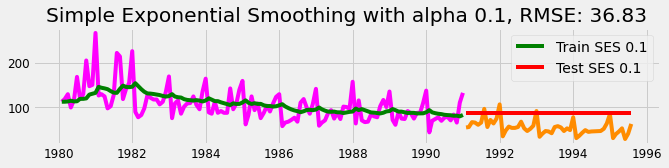

Test: For alpha = 0.20,  RMSE is 41.3617 MAPE is 72.21
For smoothing level = 0.20,  Initial level 112.00


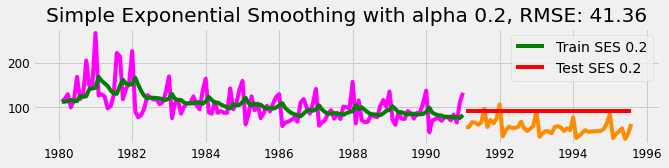

Test: For alpha = 0.30,  RMSE is 47.5046 MAPE is 83.71
For smoothing level = 0.30,  Initial level 112.00


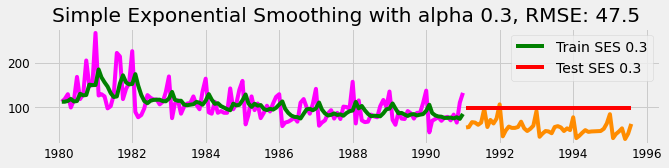

Test: For alpha = 0.50,  RMSE is 59.6416 MAPE is 106.81
For smoothing level = 0.50,  Initial level 112.00


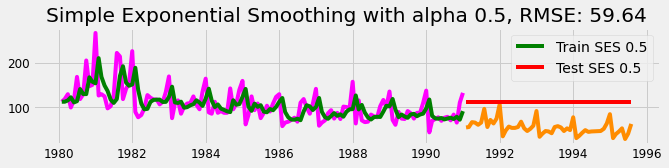

Test: For alpha = 0.99,  RMSE is 79.4985 MAPE is 144.69
For smoothing level = 0.99,  Initial level 112.00


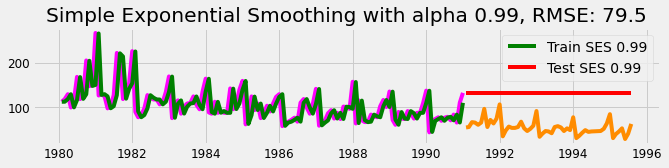

In [209]:
alpha_list = [0.1, 0.2, 0.3, 0.5, 0.99]
pred_train_SES  = train.copy()
pred_test_SES  = test.copy() # Have a copy of the test dataset

#starting a loop
for alpha_value in alpha_list:

    alpha_str            =  "SES " + str(alpha_value)
    mode_fit_i           =  model_rose.fit(smoothing_level = alpha_value, optimized=False)#fitting the model
    pred_train_SES[alpha_str]  =  mode_fit_i.fittedvalues #calculating the forecasts for the train set 
    pred_test_SES[alpha_str]  =  mode_fit_i.forecast(len(test['Rose']))#calculating the forecasts for the test set 
    rmse                 =  np.sqrt(metrics.mean_squared_error(test['Rose'], pred_test_SES[alpha_str]))#calculate the RMSE for the test set
    mape                 =  MAPE(test['Rose'],pred_test_SES[alpha_str])#calculate the MAPE for the test set
    
###

    print("Test: For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse, mape))
    print("For smoothing level = %1.2f,  Initial level %1.2f" %(mode_fit_i.params['smoothing_level'],mode_fit_i.params['initial_level']))
    plt.figure(figsize=(10,2))
    #Plotting the training, test and the predicted time series plots
    plt.plot(train['Rose'], color = 'magenta')
    plt.plot(test['Rose'], color = 'darkorange')
    plt.plot(pred_train_SES[alpha_str], label  = "Train "+alpha_str, color = 'green')
    plt.plot(pred_test_SES[alpha_str], label  = "Test "+alpha_str, color = 'red')
    plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value)+', RMSE: '+str(np.round(rmse,2)))
    plt.legend(loc='best') 
    plt.show()

In [210]:
model_SES_autofit2 = model_rose.fit(optimized=True,use_brute=True)
model_SES_autofit2.params

{'damping_slope': nan,
 'initial_level': 134.38712015111975,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': nan,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.09875003987520162,
 'smoothing_seasonal': nan,
 'smoothing_slope': nan,
 'use_boxcox': False}

In [211]:
SES_train['predict_rose'] = model_SES_autofit2.fittedvalues
SES_train.head()

Rose  predict_rose
Time_Stamp                     
1980-01-31  112.0    134.387120
1980-02-29  118.0    132.176391
1980-03-31  129.0    130.776472
1980-04-30   99.0    130.601045
1980-05-31  116.0    127.480441

In [212]:
SES_test['predict_rose'] = model_SES_autofit2.forecast(steps=len(SES_test))
SES_test.head()

Rose  predict_rose
Time_Stamp                    
1991-01-31  54.0     87.105003
1991-02-28  55.0     87.105003
1991-03-31  66.0     87.105003
1991-04-30  65.0     87.105003
1991-05-31  60.0     87.105003

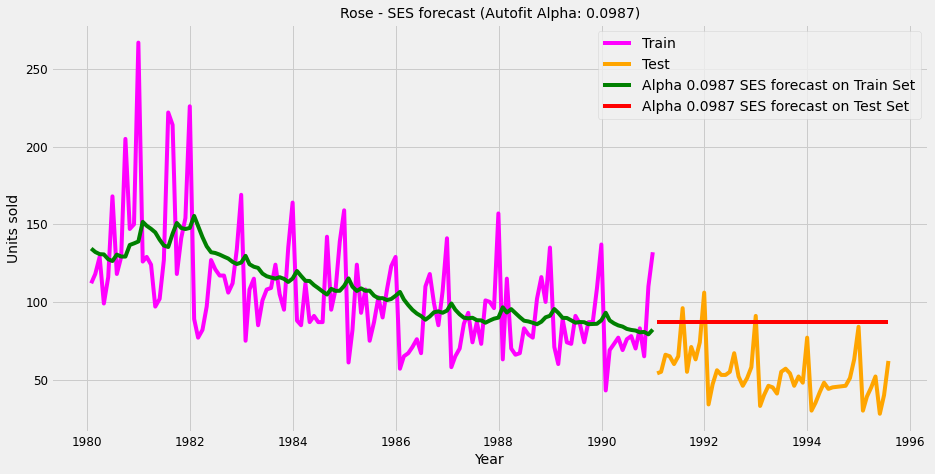

In [213]:
#plt.figure(figsize=(16,8))
plt.plot(SES_train['Rose'], label='Train', color = 'magenta')
plt.plot(SES_test['Rose'], label='Test', color = 'orange')

plt.plot(SES_train['predict_rose'],color = 'green', label='Alpha 0.0987 SES forecast on Train Set')
plt.plot(SES_test['predict_rose'],color = 'red', label='Alpha 0.0987 SES forecast on Test Set')

plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Rose - SES forecast (Autofit Alpha: 0.0987)', fontsize = 14);

**Model Evaluation**

In [214]:
## Rose Training Data - RMSE and MAPE

rmse_rose_model5_train = metrics.mean_squared_error(train['Rose'],SES_train['predict_rose'],squared=False)
mape_rose_model5_train = MAPE(train['Rose'],SES_train['predict_rose'])
print("For SES forecast on the Rose Training Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_train, mape_rose_model5_train))

For SES forecast on the Rose Training Data:  RMSE is 31.501 and MAPE is 22.73


In [215]:
## Rose Testing Data - RMSE and MAPE

rmse_rose_model5_test = metrics.mean_squared_error(test['Rose'],SES_test['predict_rose'],squared=False)
mape_rose_model5_test = MAPE(test['Rose'],SES_test['predict_rose'])
print("For SES forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model5_test, mape_rose_model5_test))

For SES forecast on the Rose Testing Data:  RMSE is 36.796 and MAPE is 63.88


In [216]:
resultsDf_5 = pd.DataFrame({'Test RMSE': [rmse_rose_model5_test],'Test MAPE': [mape_rose_model5_test]},index=['SES Alpha 0.01'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_5])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime  15.268885      22.82
NaiveModel        79.718559     145.10
SimpleAverage     53.460350      94.93
2 point TMA       11.529278      13.54
4 point TMA       14.451364      19.49
6 point TMA       14.566269      20.82
9 point TMA       14.727594      21.01
SES Alpha 0.01    36.796022      63.88

**Model 6: Double Exponential Smoothing (Holt's Model)**

In [217]:
DES_train = train.copy()
DES_test = test.copy()

In [218]:
model_DES_rose = Holt(DES_train['Rose'])

In [219]:
resultsDf_6_rose = pd.DataFrame({'Alpha':[],'Beta':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        model_DES_rose_alpha_i_j = model_DES_rose.fit(smoothing_level=i,smoothing_slope=j,optimized=True,use_brute=True)
        DES_train['predict_rose',i,j] = model_DES_rose_alpha_i_j.fittedvalues
        DES_test['predict_rose',i,j] = model_DES_rose_alpha_i_j.forecast(len(test['Rose']))
        
        rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',i,j],squared=False)
        mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',i,j])
        
        rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',i,j],squared=False)
        mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',i,j])
        
        resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':i,'Beta':j,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [220]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056911      64.02
1     0.1   0.2   33.450729       24.45  48.688399      83.09
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   33.145789       24.46  78.156381     131.24
20    0.3   0.1   33.528397       23.47  98.653063     170.12

In [221]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0     0.1   0.1   32.026565       22.78  37.056911      64.02
1     0.1   0.2   33.450729       24.45  48.688399      83.09
10    0.2   0.1   32.796403       23.06  65.731352     113.20
2     0.1   0.3   33.145789       24.46  78.156381     131.24
3     0.1   0.4   33.262191       24.68  99.583210     165.53

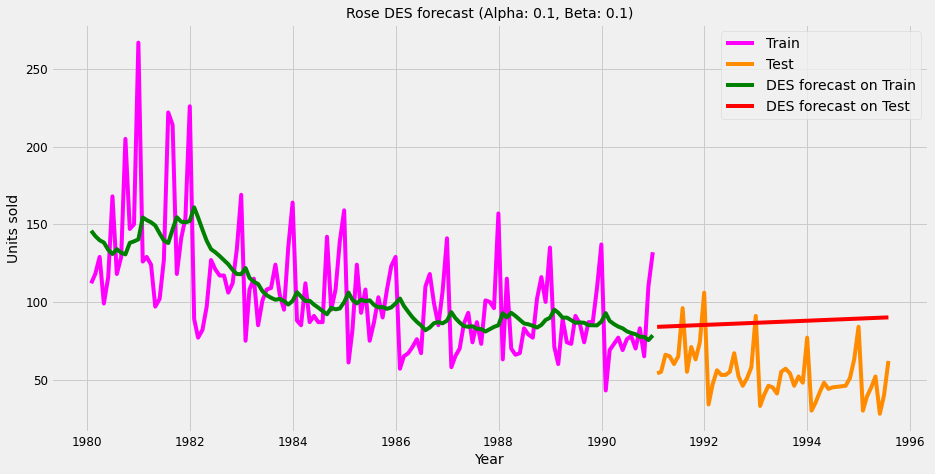

In [222]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(DES_train['predict_rose', 0.1, 0.1], color = 'green', label='DES forecast on Train')
plt.plot(DES_test['predict_rose', 0.1, 0.1], color = 'red', label='DES forecast on Test')

plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Alpha: 0.1, Beta: 0.1)', fontsize=14);
plt.legend(loc='best');

Attempting autofit

In [223]:
model_DES_rose_autofit = model_DES_rose.fit(optimized=True,use_brute=True)

In [224]:
model_DES_rose_autofit.params

{'damping_slope': nan,
 'initial_level': 112.0,
 'initial_seasons': array([], dtype=float64),
 'initial_slope': 6.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.15789473684210525,
 'smoothing_seasonal': nan,
 'smoothing_slope': 0.15789473684210525,
 'use_boxcox': False}

In [225]:
alpha = model_DES_rose_autofit.params['smoothing_level']
beta = model_DES_rose_autofit.params['smoothing_slope']
alpha_6_2 = alpha
beta_6_2 = beta

In [226]:
DES_train['predict_rose',alpha,beta] = model_DES_rose_autofit.fittedvalues

In [227]:
DES_test['predict_rose',alpha,beta] = model_DES_rose_autofit.forecast(len(test['Rose']))

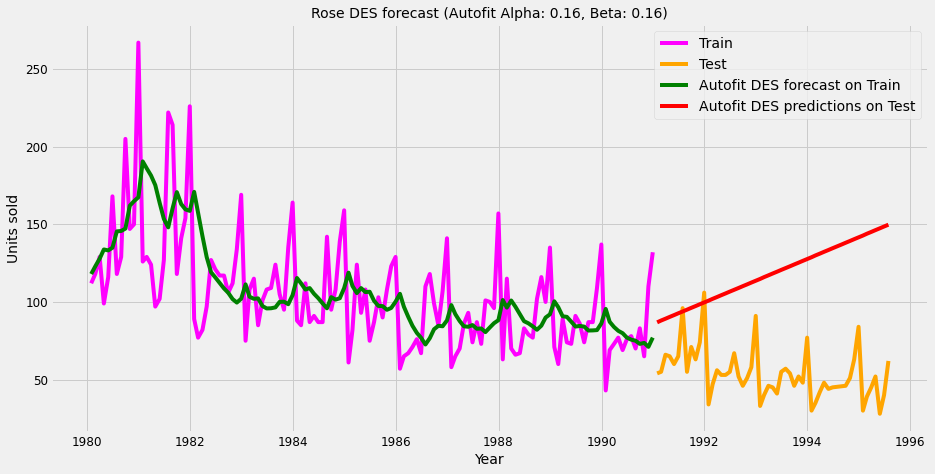

In [228]:
#plt.figure(figsize=(10,5))
plt.plot(DES_train['Rose'], label='Train', color = 'magenta')
plt.plot(DES_test['Rose'], label='Test', color = 'orange')

plt.plot(DES_train['predict_rose',alpha,beta], color = 'green', label='Autofit DES forecast on Train')
plt.plot(DES_test['predict_rose',alpha,beta], color = 'red', label='Autofit DES predictions on Test')

plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Rose DES forecast (Autofit Alpha: 0.16, Beta: 0.16)', fontsize=14)

plt.legend(loc='best');

In [229]:
rmse_rose_model6_train = metrics.mean_squared_error(DES_train['Rose'],DES_train['predict_rose',alpha,beta],squared=False)
mape_rose_model6_train = MAPE(DES_train['Rose'],DES_train['predict_rose',alpha,beta])
        
rmse_rose_model6_test = metrics.mean_squared_error(DES_test['Rose'],DES_test['predict_rose',alpha,beta],squared=False)
mape_rose_model6_test = MAPE(DES_test['Rose'],DES_test['predict_rose',alpha,beta])
        
resultsDf_6_rose = resultsDf_6_rose.append({'Alpha':alpha,'Beta':beta,'Train RMSE':rmse_rose_model6_train
                                      ,'Train MAPE': mape_rose_model6_train,'Test RMSE':rmse_rose_model6_test
                                      ,'Test MAPE':mape_rose_model6_test}, ignore_index=True)

In [230]:
resultsDf_6_rose.sort_values(by=['Test RMSE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0    0.100000  0.100000   32.026565       22.78  37.056911      64.02
1    0.100000  0.200000   33.450729       24.45  48.688399      83.09
10   0.200000  0.100000   32.796403       23.06  65.731352     113.20
100  0.157895  0.157895   33.074575       23.99  70.572197     120.25
2    0.100000  0.300000   33.145789       24.46  78.156381     131.24

In [231]:
resultsDf_6_rose.sort_values(by=['Test MAPE']).head()

Alpha      Beta  Train RMSE  Train MAPE  Test RMSE  Test MAPE
0    0.100000  0.100000   32.026565       22.78  37.056911      64.02
1    0.100000  0.200000   33.450729       24.45  48.688399      83.09
10   0.200000  0.100000   32.796403       23.06  65.731352     113.20
100  0.157895  0.157895   33.074575       23.99  70.572197     120.25
2    0.100000  0.300000   33.145789       24.46  78.156381     131.24

**Model Evaluation**

In [232]:
resultsDf_6_1 = pd.DataFrame({'Test RMSE':[resultsDf_6_rose['Test RMSE'][100],resultsDf_6_rose['Test RMSE'][0]],
                              'Test MAPE':[resultsDf_6_rose['Test MAPE'][100],resultsDf_6_rose['Test MAPE'][0]]}
                           ,index=['DES Alpha 0.16, Beta 0.16','DES Alpha 0.10, Beta 0.10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_6_1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime           15.268885      22.82
NaiveModel                 79.718559     145.10
SimpleAverage              53.460350      94.93
2 point TMA                11.529278      13.54
4 point TMA                14.451364      19.49
6 point TMA                14.566269      20.82
9 point TMA                14.727594      21.01
SES Alpha 0.01             36.796022      63.88
DES Alpha 0.16, Beta 0.16  70.572197     120.25
DES Alpha 0.10, Beta 0.10  37.056911      64.02

**Model 7: Triple Exponential Smoothing (Holt - Winter's Model)**

In [233]:
TES_train = train.copy()
TES_test = test.copy()

In [234]:
model_TES_2 = ExponentialSmoothing(TES_train['Rose'],trend='additive',seasonal='multiplicative',freq='M')

In [235]:
resultsDf_7_2 = pd.DataFrame({'Alpha':[],'Beta':[],'Gamma':[],'Train RMSE':[],'Train MAPE':[]
                                ,'Test RMSE': [],'Test MAPE': []})

In [236]:
for i in np.arange(0.1,1.1,0.1):
    for j in np.arange(0.1,1.1,0.1):
        for k in np.arange(0.1,1.1,0.1):
            model_TES_alpha_i_j_k = model_TES_2.fit(smoothing_level=i,smoothing_slope=j,smoothing_seasonal=k,optimized=True,use_brute=True)
            TES_train['predict_rose',i,j,k] = model_TES_alpha_i_j_k.fittedvalues
            TES_test['predict_rose',i,j,k] = model_TES_alpha_i_j_k.forecast(steps=len(test['Rose']))
        
            rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',i,j,k],squared=False)
            mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',i,j,k])
        
            rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',i,j,k],squared=False)
            mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',i,j,k])
        
            resultsDf_7_2 = resultsDf_7_2.append({'Alpha':i,'Beta':j,'Gamma':k,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [237]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
11     0.1   0.2    0.2   24.365597       15.36   9.640616      13.96
12     0.1   0.2    0.3   23.969166       15.13   9.935672      14.21
10     0.1   0.2    0.1   25.529854       16.06   9.943512      14.39
142    0.2   0.5    0.3   27.631767       17.87  10.026322      14.34
151    0.2   0.6    0.2   28.289836       18.09  10.031754      13.62

In [238]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
151    0.2   0.6    0.2   28.289836       18.09  10.031754      13.62
223    0.3   0.3    0.4   24.209084       16.78  10.169742      13.67
11     0.1   0.2    0.2   24.365597       15.36   9.640616      13.96
214    0.3   0.2    0.5   24.580627       16.87  10.413322      14.00
12     0.1   0.2    0.3   23.969166       15.13   9.935672      14.21

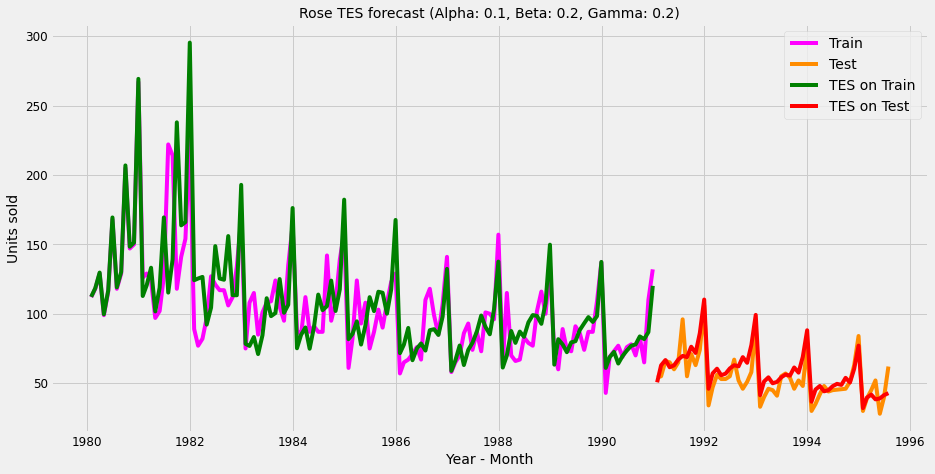

In [239]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

#plt.plot(TES_train['predict_rose', 0.2, 0.6, 0.2], color = 'green', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Train')
#plt.plot(TES_test['predict_rose', 0.2, 0.6, 0.2], color='red', label='Alpha=0.2,Beta=0.6,Gamma=0.2,TES on Test')

plt.plot(TES_train['predict_rose', 0.1, 0.2, 0.2], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose', 0.1, 0.2, 0.2], color='red', label='TES on Test')

plt.xlabel('Year - Month')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Alpha: 0.1, Beta: 0.2, Gamma: 0.2)', fontsize=14)

plt.legend(loc='best');

Attempt autofit

In [240]:
model_TES_autofit = model_TES_2.fit(optimized=True,use_brute=True)

In [241]:
model_TES_autofit.params

{'damping_slope': nan,
 'initial_level': 76.65565186546128,
 'initial_seasons': array([1.47550231, 1.65927093, 1.80572588, 1.58888782, 1.77822665,
        1.92604314, 2.11649409, 2.25135146, 2.11690519, 2.08112772,
        2.40927212, 3.30448044]),
 'initial_slope': 0.0,
 'lamda': None,
 'remove_bias': False,
 'smoothing_level': 0.10609635974778751,
 'smoothing_seasonal': 0.0,
 'smoothing_slope': 0.048438458440198374,
 'use_boxcox': False}

In [242]:
alpha = model_TES_autofit.params['smoothing_level']
beta = model_TES_autofit.params['smoothing_slope']
gamma = model_TES_autofit.params['smoothing_seasonal']
alpha_7_2 = alpha
beta_7_2 = beta
gamma_7_2 = gamma

In [243]:
TES_train['predict_rose',alpha,beta,gamma] = model_TES_autofit.fittedvalues

TES_test['predict_rose',alpha,beta,gamma] = model_TES_autofit.forecast(steps=len(test['Rose']))

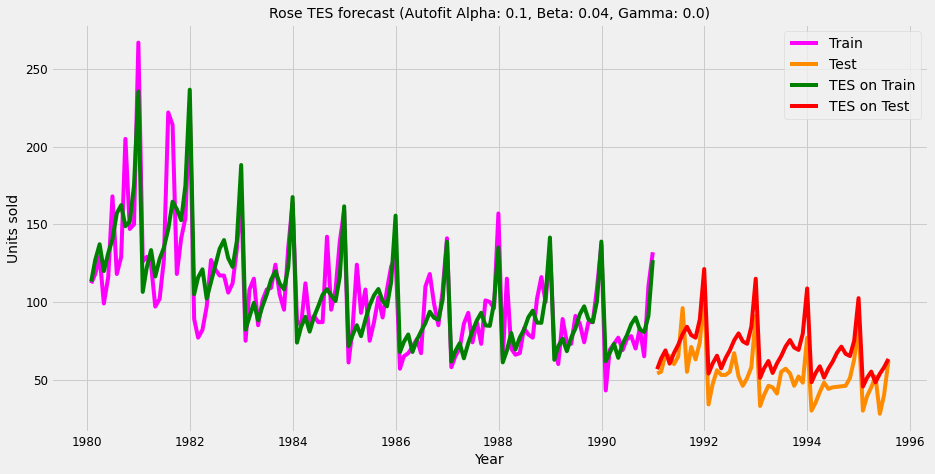

In [244]:
plt.plot(TES_train['Rose'], label='Train', color = 'magenta')
plt.plot(TES_test['Rose'], label='Test', color = 'darkorange')

plt.plot(TES_train['predict_rose',alpha,beta,gamma], color = 'green', label='TES on Train')
plt.plot(TES_test['predict_rose',alpha,beta,gamma], color='red', label='TES on Test')

plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Rose TES forecast (Autofit Alpha: 0.1, Beta: 0.04, Gamma: 0.0)', fontsize=14)

plt.legend(loc='best');

In [245]:
rmse_rose_model7_train = metrics.mean_squared_error(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_train = MAPE(TES_train['Rose'],TES_train['predict_rose',alpha,beta,gamma])
        
rmse_rose_model7_test = metrics.mean_squared_error(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma],squared=False)
mape_rose_model7_test = MAPE(TES_test['Rose'],TES_test['predict_rose',alpha,beta,gamma])
        
resultsDf_7_2 = resultsDf_7_2.append({'Alpha':alpha,'Beta':beta,'Gamma':gamma,'Train RMSE':rmse_rose_model7_train
                                      ,'Train MAPE': mape_rose_model7_train,'Test RMSE':rmse_rose_model7_test
                                      ,'Test MAPE': mape_rose_model7_test}, ignore_index=True)

In [246]:
resultsDf_7_2.tail()

Alpha      Beta  Gamma  ...  Train MAPE     Test RMSE  Test MAPE
996   1.000000  1.000000    0.7  ...     4617.55  23029.955358   11836.01
997   1.000000  1.000000    0.8  ...      493.75   9626.710890    8580.97
998   1.000000  1.000000    0.9  ...     2303.41   9691.905408    7916.16
999   1.000000  1.000000    1.0  ...      614.79   8138.618610    6811.03
1000  0.106096  0.048438    0.0  ...       13.21     17.369211      28.88

[5 rows x 7 columns]

In [247]:
resultsDf_7_2.sort_values(by=['Test RMSE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
11     0.1   0.2    0.2   24.365597       15.36   9.640616      13.96
12     0.1   0.2    0.3   23.969166       15.13   9.935672      14.21
10     0.1   0.2    0.1   25.529854       16.06   9.943512      14.39
142    0.2   0.5    0.3   27.631767       17.87  10.026322      14.34
151    0.2   0.6    0.2   28.289836       18.09  10.031754      13.62

In [248]:
resultsDf_7_2.sort_values(by=['Test MAPE']).head()

Alpha  Beta  Gamma  Train RMSE  Train MAPE  Test RMSE  Test MAPE
151    0.2   0.6    0.2   28.289836       18.09  10.031754      13.62
223    0.3   0.3    0.4   24.209084       16.78  10.169742      13.67
11     0.1   0.2    0.2   24.365597       15.36   9.640616      13.96
214    0.3   0.2    0.5   24.580627       16.87  10.413322      14.00
12     0.1   0.2    0.3   23.969166       15.13   9.935672      14.21

**Model Evaluation**

In [249]:
resultsDf_7_ro = pd.DataFrame({'Test RMSE': [resultsDf_7_2['Test RMSE'][11],resultsDf_7_2['Test RMSE'][1000]],
                              'Test MAPE': [resultsDf_7_2['Test MAPE'][11],resultsDf_7_2['Test MAPE'][1000]]}
                           ,index=['TES Alpha 0.1, Beta 0.2, Gamma 0.2','TES Alpha 0.11, Beta 0.05, Gamma 0.00'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_7_ro])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796022      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369211      28.88

In [250]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369211      28.88
SES Alpha 0.01                         36.796022      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
DES Alpha 0.16, Beta 0.16              70.572197     120.25
NaiveModel                             79.718559     145.10

**Plot all above models**

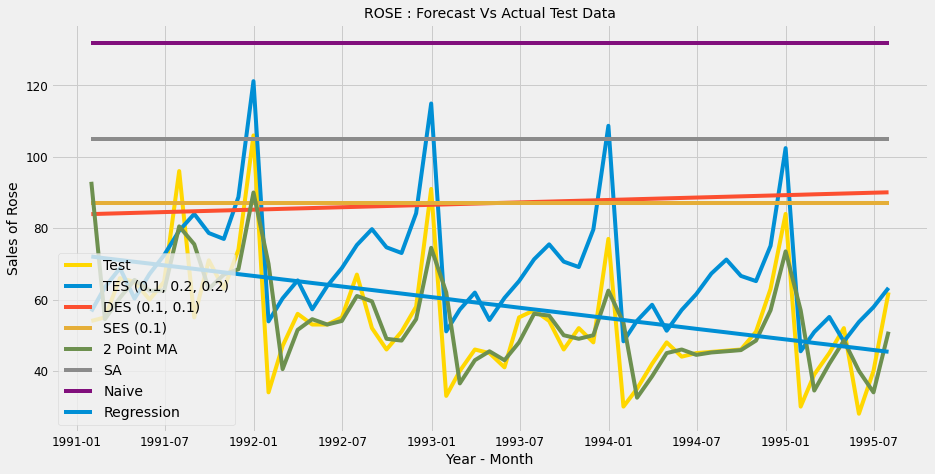

In [251]:
plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES (0.1, 0.2, 0.2)')
#DES
plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES (0.1, 0.1)')
#SES
plt.plot(SES_test['predict_rose'],  label='SES (0.1)')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='best')
plt.xlabel('Year - Month')
plt.ylabel('Sales of Rose')
plt.title('ROSE : Forecast Vs Actual Test Data', fontsize=14);

**ARIMA Models**

Check for stationarity of the whole Time Series data.

In [252]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, color):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color=color,label='Observed')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

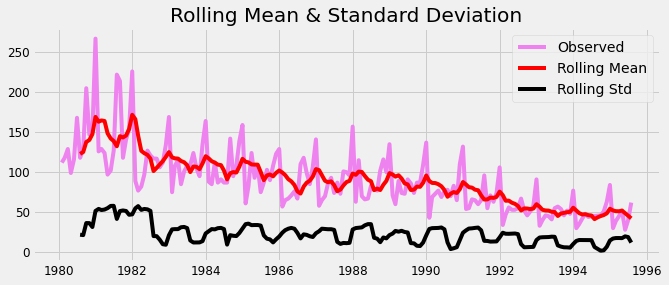

Results of Dickey-Fuller Test:
Test Statistic                  -1.876719
p-value                          0.343091
#Lags Used                      13.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64 



In [253]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'], 'violet')

We see that at 5% significant level, the time series is non-stationary.

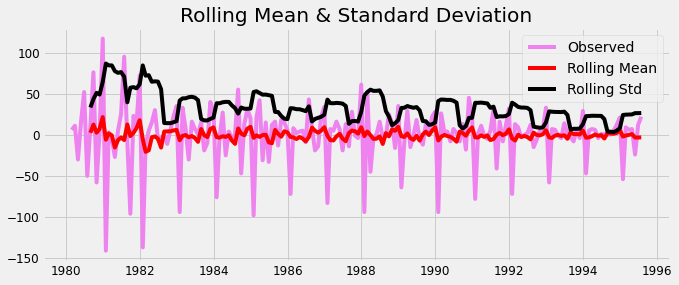

Results of Dickey-Fuller Test:
Test Statistic                -8.044395e+00
p-value                        1.810868e-12
#Lags Used                     1.200000e+01
Number of Observations Used    1.730000e+02
Critical Value (1%)           -3.468726e+00
Critical Value (5%)           -2.878396e+00
Critical Value (10%)          -2.575756e+00
dtype: float64 



In [254]:
plt.figure(figsize=(10,4))
test_stationarity(df['Rose'].diff().dropna(), 'violet')

At difference of order 1, Rose time series is stationary with no trend. We have visible seasoality but it it additive or mutiplicative?

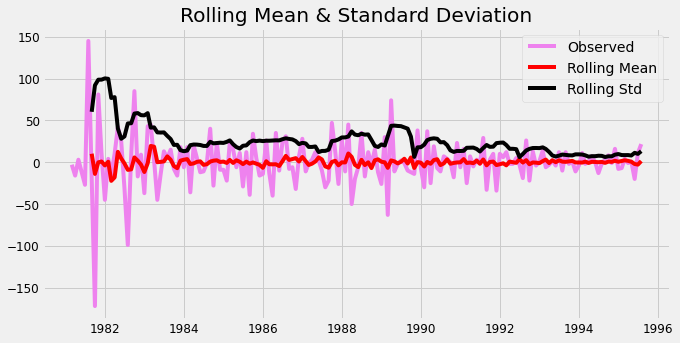

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [255]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(), 'violet')

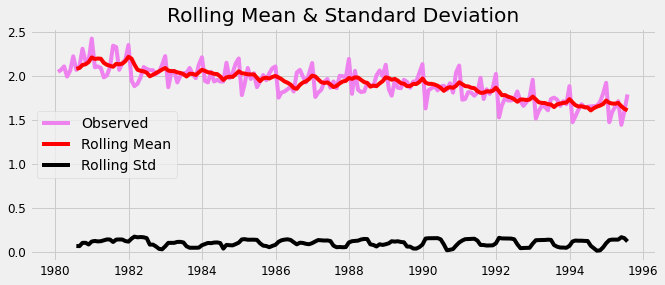

Results of Dickey-Fuller Test:
Test Statistic                  -0.422555
p-value                          0.906264
#Lags Used                      12.000000
Number of Observations Used    174.000000
Critical Value (1%)             -3.468502
Critical Value (5%)             -2.878298
Critical Value (10%)            -2.575704
dtype: float64 



In [256]:
plt.figure(figsize=(10,4))
test_stationarity(np.log10(df['Rose']), 'violet')

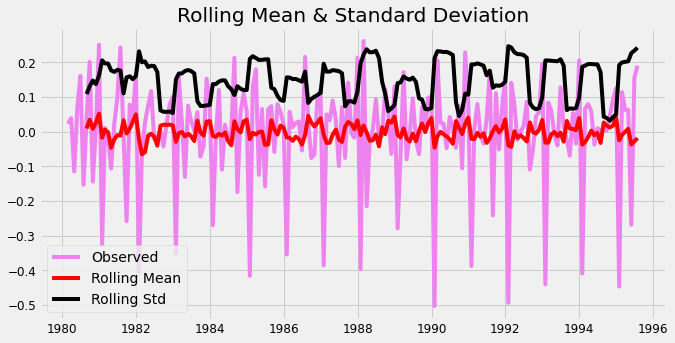

Results of Dickey-Fuller Test:
Test Statistic                -8.669696e+00
p-value                        4.581847e-14
#Lags Used                     1.100000e+01
Number of Observations Used    1.740000e+02
Critical Value (1%)           -3.468502e+00
Critical Value (5%)           -2.878298e+00
Critical Value (10%)          -2.575704e+00
dtype: float64 



In [257]:
plt.figure(figsize=(10,5))
test_stationarity(np.log10(df['Rose']).diff().dropna(), 'violet')

**Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.**

In [258]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

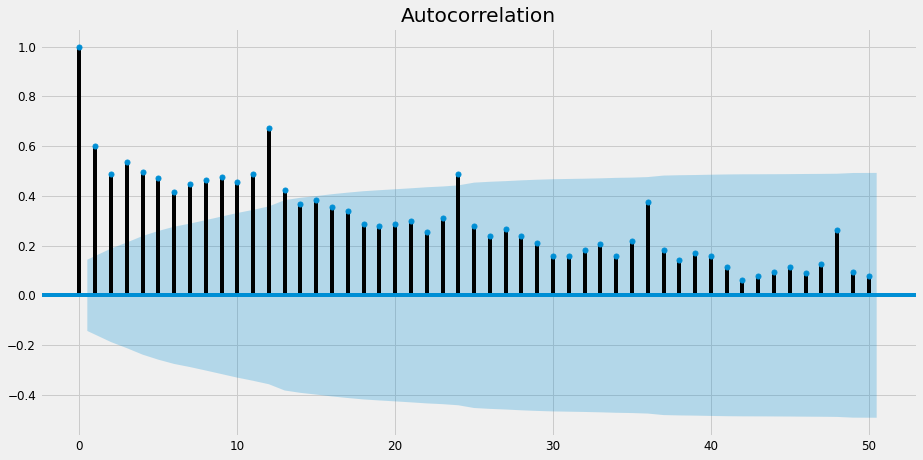

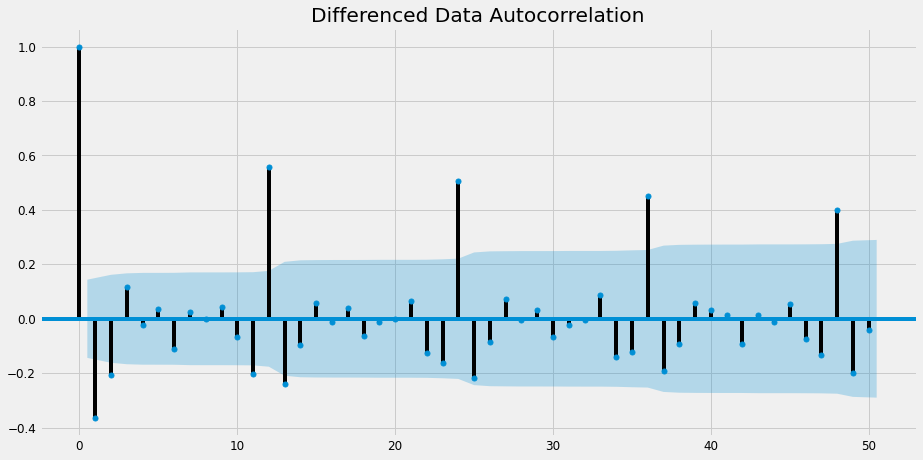

In [259]:
plot_acf(df['Rose'],lags=50)
plot_acf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show();

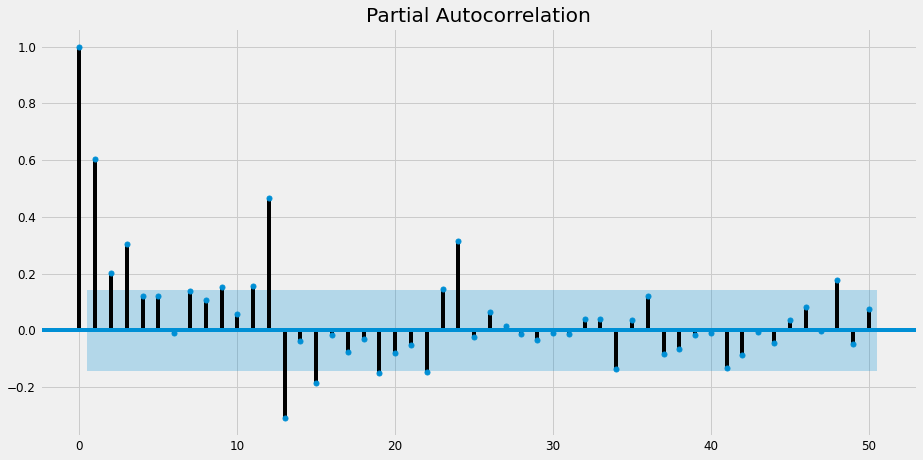

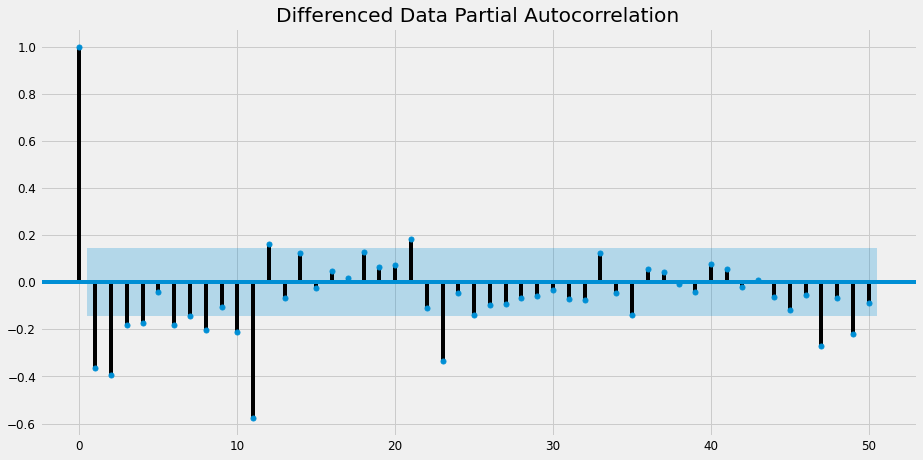

In [260]:
plot_pacf(df['Rose'],lags=50)
plot_pacf(df['Rose'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

**Model 8: SARIMA**

In [261]:
SARIMA_train = train.copy()
SARIMA_test = test.copy()

Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

**AUTO SARIMA on original data**

In [262]:
import itertools
p = q = range(0,4)
d= range(1,2)
D = range(1,2)

pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (0, 1, 3)(0, 1, 3, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (1, 1, 3)(1, 1, 3, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)
Model: (2, 1, 3)(2, 1, 3, 12)
Model: (3, 1, 0)(3, 1, 0, 12)
Model: (3, 1, 1)(3, 1, 1, 12)
Model: (3, 1, 2)(3, 1, 2, 12)
Model: (3, 1, 3)(3, 1, 3, 12)


In [263]:
SARIMA_AIC_rose = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [264]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose = SARIMA_model_rose.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose.aic))
        SARIMA_AIC_rose = SARIMA_AIC_rose.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:1171.2013438278946
SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:965.5057301633203
SARIMA(0, 1, 0)x(0, 1, 2, 12)7 - AIC:845.8687014776114
SARIMA(0, 1, 0)x(0, 1, 3, 12)7 - AIC:3493.459319005141
SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:982.326958965881
SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:975.3375383601627
SARIMA(0, 1, 0)x(1, 1, 2, 12)7 - AIC:847.7332182654629
SARIMA(0, 1, 0)x(1, 1, 3, 12)7 - AIC:3330.5401293167197
SARIMA(0, 1, 0)x(2, 1, 0, 12)7 - AIC:858.5132698374413
SARIMA(0, 1, 0)x(2, 1, 1, 12)7 - AIC:853.339072914696
SARIMA(0, 1, 0)x(2, 1, 2, 12)7 - AIC:842.6282244225355
SARIMA(0, 1, 0)x(2, 1, 3, 12)7 - AIC:3305.534713919546
SARIMA(0, 1, 0)x(3, 1, 0, 12)7 - AIC:752.3958122739785
SARIMA(0, 1, 0)x(3, 1, 1, 12)7 - AIC:748.3165246485746
SARIMA(0, 1, 0)x(3, 1, 2, 12)7 - AIC:748.9721713388262
SARIMA(0, 1, 0)x(3, 1, 3, 12)7 - AIC:3158.588404891991
SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:1113.7663133560852
SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:915.0730606717653
SARIMA(0,

In [265]:
SARIMA_AIC_rose.sort_values(by=['AIC']).head()

param       seasonal         AIC
221  (3, 1, 1)  (3, 1, 1, 12)  681.362817
253  (3, 1, 3)  (3, 1, 1, 12)  681.607795
254  (3, 1, 3)  (3, 1, 2, 12)  681.972961
222  (3, 1, 1)  (3, 1, 2, 12)  682.320699
237  (3, 1, 2)  (3, 1, 1, 12)  683.211700

In [266]:
auto_SARIMA_rose = sm.tsa.statespace.SARIMAX(SARIMA_train['Rose'].values,
                                order=(3, 1, 1),
                                seasonal_order=(3, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose = auto_SARIMA_rose.fit(maxiter=1000)
print(results_auto_SARIMA_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(3, 1, 1)x(3, 1, 1, 12)   Log Likelihood                -331.681
Date:                            Fri, 08 Oct 2021   AIC                            681.363
Time:                                    07:05:55   BIC                            702.801
Sample:                                         0   HQIC                           689.958
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0171      0.151      0.113      0.910      -0.279       0.313
ar.L2         -0.0425      0.141   

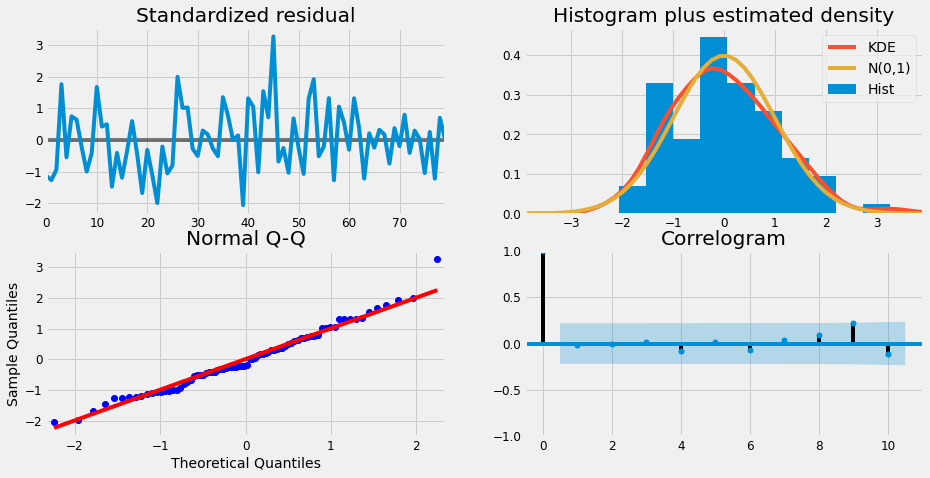

In [267]:
results_auto_SARIMA_rose.plot_diagnostics()
plt.show()

In [268]:
pred_dynamic = results_auto_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [269]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose = results_auto_SARIMA_rose.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [270]:
predicted_auto_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  45.225140  14.457938      16.888102      73.562179
1  63.054674  14.502678      34.629947      91.479401
2  68.114801  14.452769      39.787894      96.441709
3  61.822527  14.449015      33.502979      90.142076
4  68.435877  14.469562      40.076058      96.795697

In [271]:
# Extract the predicted and true values of our time series
rose_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_auto_forecasted'] = predicted_auto_SARIMA_rose.predicted_mean
SARIMA_test.head()

Rose  rose_auto_forecasted
Time_Stamp                            
1991-01-31  54.0             45.225140
1991-02-28  55.0             63.054674
1991-03-31  66.0             68.114801
1991-04-30  65.0             61.822527
1991-05-31  60.0             68.435877

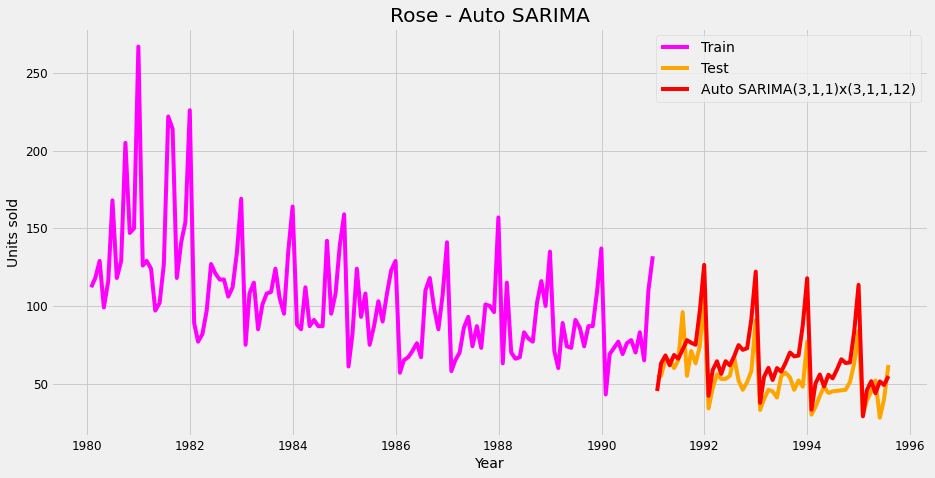

In [272]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_auto_forecasted'], color='red', label='Auto SARIMA(3,1,1)x(3,1,1,12)')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA')
plt.legend(loc='best');

In [273]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_auto_forecasted'])
print("For SARIMA forecast on the SRose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the SRose Testing Data:  RMSE is 16.822 and MAPE is 25.48


In [274]:
resultsDf_8_rose1 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(3,1,1)x(3,1,1,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose1])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796022      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369211      28.88
Auto SARIMA(3,1,1)x(3,1,1,12)          16.822203      25.48

**Auto SARIMA on log**

In [275]:
rose_log_train = np.log10(SARIMA_train['Rose'])

In [276]:
import itertools
p = q = range(0, 3)
d= range(0,2)
D = range(0,2)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 0, 1)(0, 0, 1, 12)
Model: (0, 0, 2)(0, 0, 2, 12)
Model: (0, 1, 0)(0, 1, 0, 12)
Model: (0, 1, 1)(0, 1, 1, 12)
Model: (0, 1, 2)(0, 1, 2, 12)
Model: (1, 0, 0)(1, 0, 0, 12)
Model: (1, 0, 1)(1, 0, 1, 12)
Model: (1, 0, 2)(1, 0, 2, 12)
Model: (1, 1, 0)(1, 1, 0, 12)
Model: (1, 1, 1)(1, 1, 1, 12)
Model: (1, 1, 2)(1, 1, 2, 12)
Model: (2, 0, 0)(2, 0, 0, 12)
Model: (2, 0, 1)(2, 0, 1, 12)
Model: (2, 0, 2)(2, 0, 2, 12)
Model: (2, 1, 0)(2, 1, 0, 12)
Model: (2, 1, 1)(2, 1, 1, 12)
Model: (2, 1, 2)(2, 1, 2, 12)


In [277]:
SARIMA_AIC_rose_log = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC_rose_log

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [278]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA_rose_log = SARIMA_model_rose_log.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA_rose_log.aic))
        SARIMA_AIC_rose_log = SARIMA_AIC_rose_log.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA_rose_log.aic}, ignore_index=True)

SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:555.7706618310567
SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:380.79769584054736
SARIMA(0, 0, 0)x(0, 0, 2, 12)7 - AIC:253.0221040879426
SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:-203.86905860035637
SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:-207.30753054923176
SARIMA(0, 0, 0)x(0, 1, 2, 12)7 - AIC:-200.37491005331324
SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:-214.78669155250248
SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:-256.1702817494046
SARIMA(0, 0, 0)x(1, 0, 2, 12)7 - AIC:-233.14453220986263
SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:-209.00182479393737
SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:-206.62380294148483
SARIMA(0, 0, 0)x(1, 1, 2, 12)7 - AIC:-198.50588512799956
SARIMA(0, 0, 0)x(2, 0, 0, 12)7 - AIC:-233.48304581147525
SARIMA(0, 0, 0)x(2, 0, 1, 12)7 - AIC:-233.8226498739392
SARIMA(0, 0, 0)x(2, 0, 2, 12)7 - AIC:-238.65277291765588
SARIMA(0, 0, 0)x(2, 1, 0, 12)7 - AIC:-201.49144494305034
SARIMA(0, 0, 0)x(2, 1, 1, 12)7 - AIC:-203.49925564172764
SARIMA(0, 0, 0)x(2, 1, 2, 12)7 - AIC:-

In [279]:
SARIMA_AIC_rose_log.sort_values(by=['AIC']).head()

param       seasonal         AIC
115  (1, 0, 0)  (1, 0, 1, 12) -257.620745
7    (0, 0, 0)  (1, 0, 1, 12) -256.170282
133  (1, 0, 1)  (1, 0, 1, 12) -255.482061
25   (0, 0, 1)  (1, 0, 1, 12) -254.978844
223  (2, 0, 0)  (1, 0, 1, 12) -253.620649

In [280]:
auto_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order=(1, 0, 0),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_rose_log = auto_SARIMA_rose_log.fit(maxiter=1000)
print(results_auto_SARIMA_rose_log.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(1, 0, 0)x(1, 0, 1, 12)   Log Likelihood                 132.810
Date:                            Fri, 08 Oct 2021   AIC                           -257.621
Time:                                    07:13:35   BIC                           -246.504
Sample:                                01-31-1980   HQIC                          -253.107
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1690      0.078      2.180      0.029       0.017       0.321
ar.S.L12       0.9872      0.001   

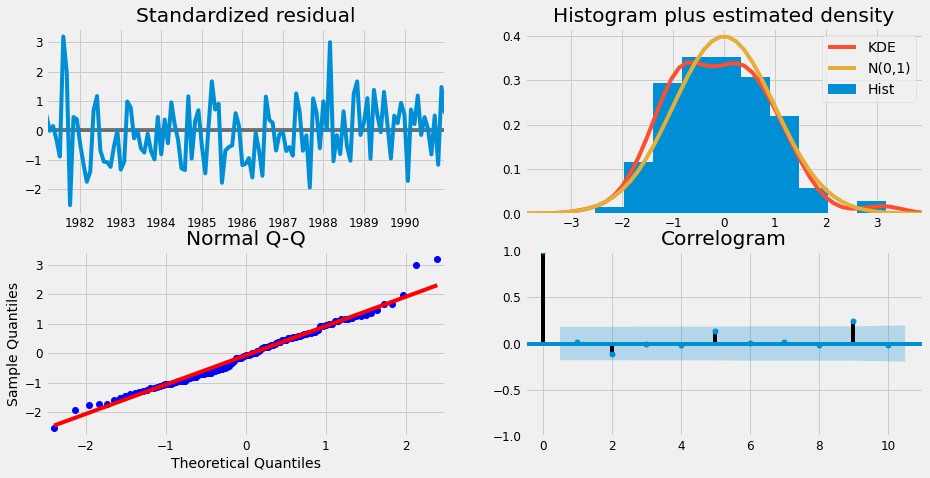

In [281]:
results_auto_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [282]:
pred_dynamic = results_auto_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [283]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_auto_SARIMA_rose_log = results_auto_SARIMA_rose_log.get_forecast(steps=len(SARIMA_test['Rose']), alpha=0.05)

In [284]:
predicted_auto_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.727954  0.073887       1.583139       1.872769
1991-02-28  1.787585  0.074674       1.641227       1.933943
1991-03-31  1.820432  0.074696       1.674030       1.966834
1991-04-30  1.780330  0.074697       1.633927       1.926733
1991-05-31  1.811704  0.074697       1.665300       1.958107

In [285]:
# Extract the predicted and true values of our time series
rose_log_forecasted = pred_dynamic.predicted_mean
#we need to change the scale of the logarithmic scale to the original scale by raising the predicted values
#to the power of 10
SARIMA_test['rose_log_auto_forecasted'] = np.power(10, predicted_auto_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Rose  rose_auto_forecasted  rose_log_auto_forecasted
Time_Stamp                                                      
1991-01-31  54.0             45.225140                 53.450768
1991-02-28  55.0             63.054674                 61.317622
1991-03-31  66.0             68.114801                 66.135121
1991-04-30  65.0             61.822527                 60.301793
1991-05-31  60.0             68.435877                 64.819197

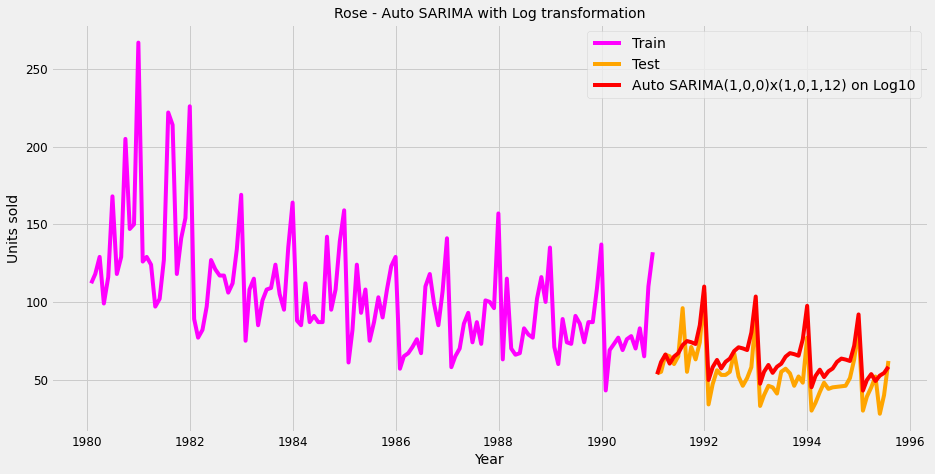

In [286]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_auto_forecasted'], color='red', label='Auto SARIMA(1,0,0)x(1,0,1,12) on Log10')

plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Rose - Auto SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best');

In [287]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_auto_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_auto_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 13.590 and MAPE is 21.92


In [288]:
resultsDf_8_rose2 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Auto SARIMA(1,0,0)x(1,0,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose2])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796022      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369211      28.88
Auto SARIMA(3,1,1)x(3,1,1,12)          16.822203      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.589879      21.92

**Manual SARIMA**

Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

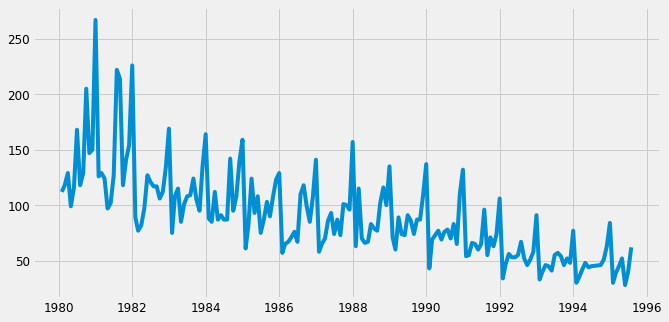

In [289]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'])

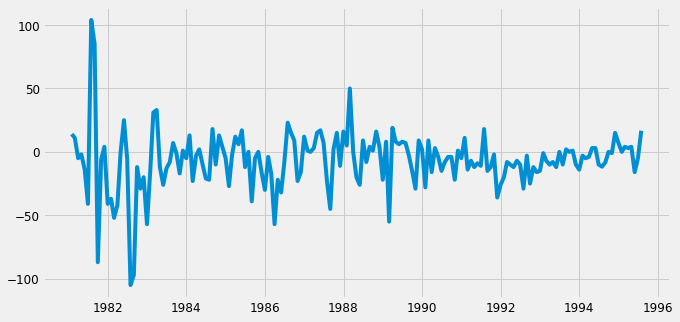

In [290]:
plt.figure(figsize=(10,5))
plt.plot(df['Rose'].diff(12).dropna());

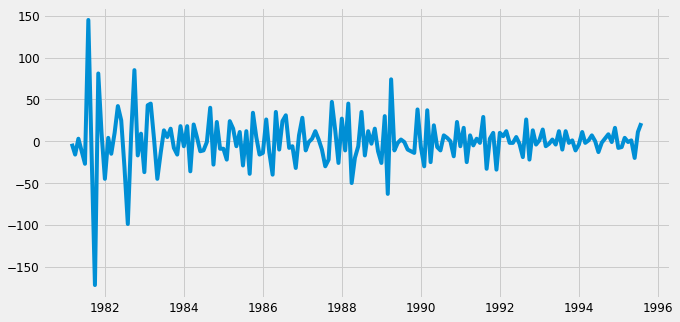

In [291]:
plt.figure(figsize=(10,5))
plt.plot((df['Rose'].diff(12).dropna()).diff().dropna())

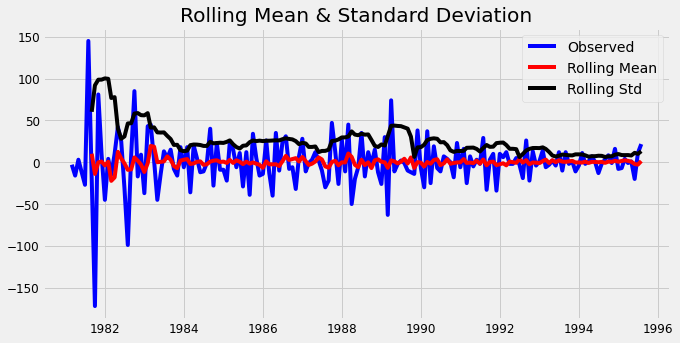

Results of Dickey-Fuller Test:
Test Statistic                  -4.605732
p-value                          0.000126
#Lags Used                      11.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64 



In [292]:
plt.figure(figsize=(10,5))
test_stationarity((df['Rose'].diff(12).dropna()).diff().dropna(),'blue');

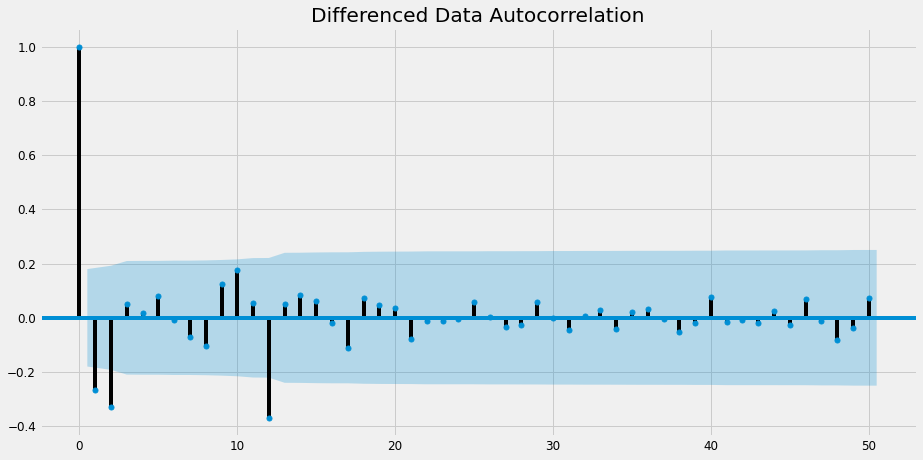

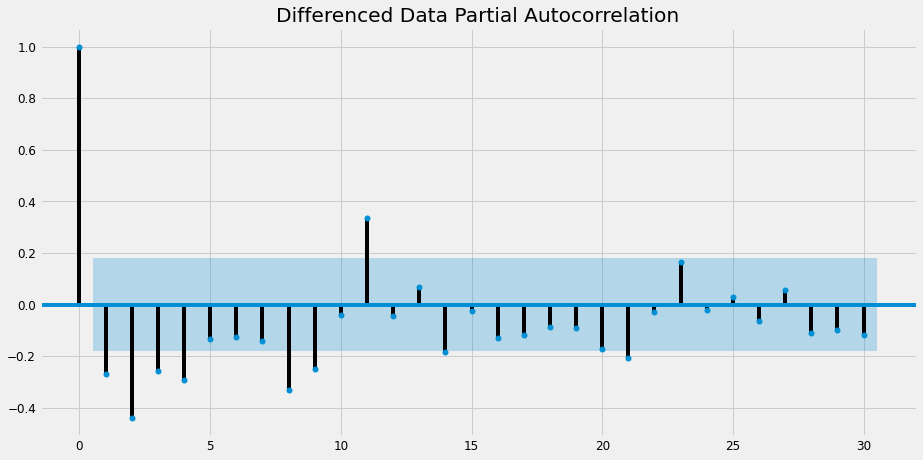

In [293]:
plot_acf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf((SARIMA_train['Rose'].diff(12).dropna()).diff().dropna(),lags=30,title='Differenced Data Partial Autocorrelation')
plt.show();

In [294]:
manual_SARIMA_rose = sm.tsa.statespace.SARIMAX(train['Rose'].values,
                                order=(4, 1, 2),
                                #seasonal_order=(0, 1, 1, 12),
                                seasonal_order=(0, 1, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose = manual_SARIMA_rose.fit(maxiter=1000)
print(results_manual_SARIMA_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(4, 1, 2)x(0, 1, 2, 12)   Log Likelihood                -384.369
Date:                            Fri, 08 Oct 2021   AIC                            786.737
Time:                                    07:13:41   BIC                            809.433
Sample:                                         0   HQIC                           795.898
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8967      0.132     -6.814      0.000      -1.155      -0.639
ar.L2          0.0165      0.171   

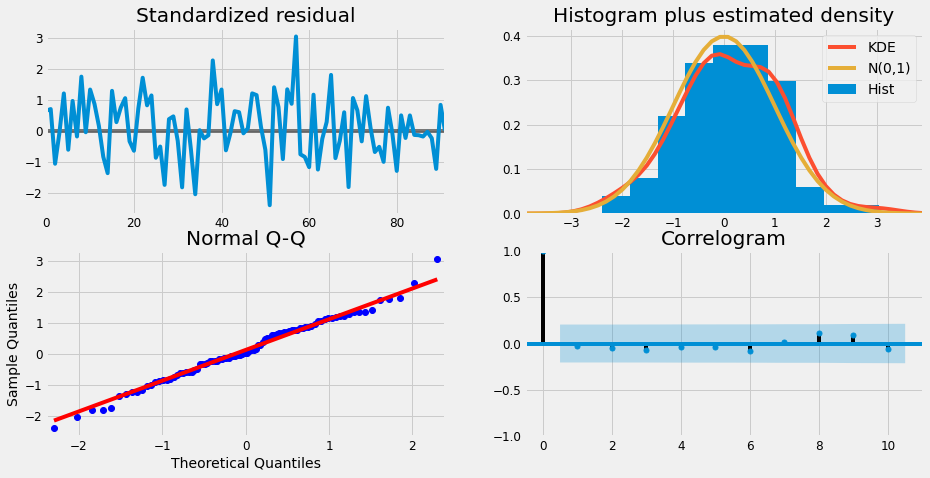

In [295]:
results_manual_SARIMA_rose.plot_diagnostics()
plt.show()

In [296]:
pred_dynamic = results_manual_SARIMA_rose.get_prediction(dynamic=True, full_results=True)

In [297]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose = results_manual_SARIMA_rose.get_forecast(steps=len(test['Rose']), alpha=0.05);

In [298]:
predicted_manual_SARIMA_rose.summary_frame(alpha=0.05).head()

y       mean    mean_se  mean_ci_lower  mean_ci_upper
0  44.733041  15.552666      14.250376      75.215705
1  64.208693  16.000767      32.847767      95.569620
2  65.110689  16.074606      33.605041      96.616337
3  68.453063  16.150995      36.797694     100.108432
4  61.423433  16.154555      29.761087      93.085780

In [299]:
rose_log_forecasted = pred_dynamic.predicted_mean
SARIMA_test['rose_manual_forecasted'] = predicted_manual_SARIMA_rose.predicted_mean
SARIMA_test.head()

Rose  ...  rose_manual_forecasted
Time_Stamp        ...                        
1991-01-31  54.0  ...               44.733041
1991-02-28  55.0  ...               64.208693
1991-03-31  66.0  ...               65.110689
1991-04-30  65.0  ...               68.453063
1991-05-31  60.0  ...               61.423433

[5 rows x 4 columns]

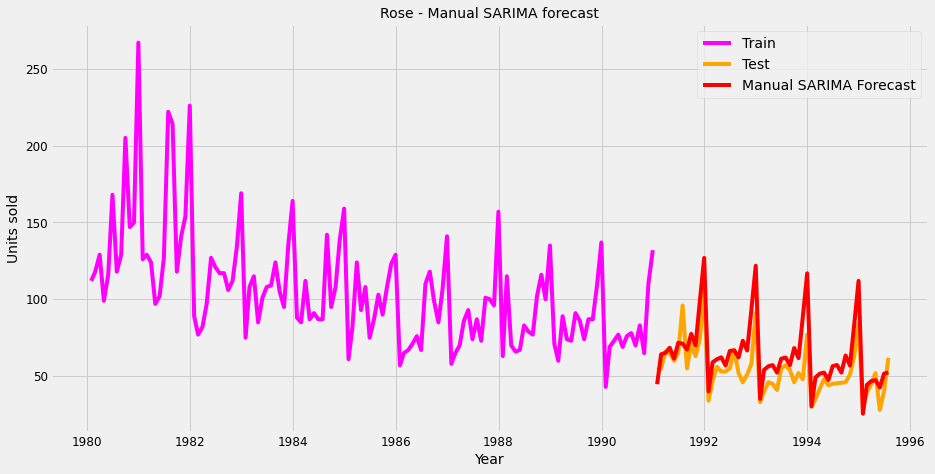

In [300]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_manual_forecasted'], color='red', label='Manual SARIMA Forecast')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA forecast', fontsize=14)

plt.legend(loc='best');

In [301]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 15.377 and MAPE is 22.16


In [302]:
resultsDf_8_rose3 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,2)x(0,1,2,12)'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose3])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796022      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369211      28.88
Auto SARIMA(3,1,1)x(3,1,1,12)          16.822203      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.589879      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16

**Manual SARIMA on Log**

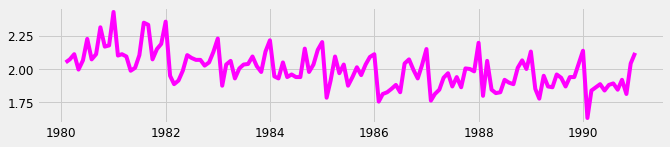

In [303]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train, color='magenta')

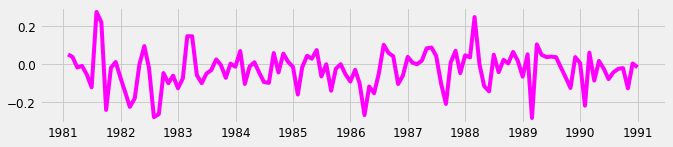

In [304]:
plt.figure(figsize=(10,2))
plt.plot(rose_log_train.diff(12).dropna(), color='magenta')#.diff().dropna());

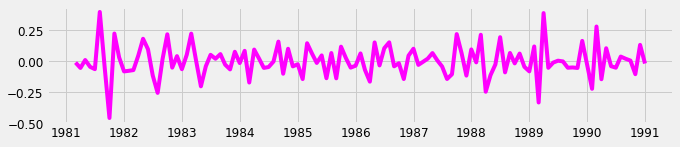

In [305]:
plt.figure(figsize=(10,2))
plt.plot((rose_log_train.diff(12).dropna()).diff().dropna(), color='magenta')#.diff().dropna());

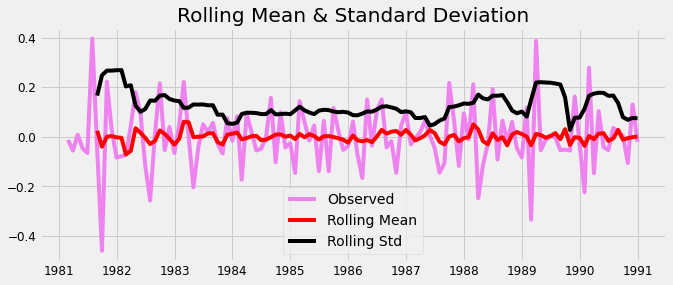

Results of Dickey-Fuller Test:
Test Statistic                  -3.910109
p-value                          0.001962
#Lags Used                      11.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64 



In [306]:
plt.figure(figsize=(10,4))
test_stationarity((rose_log_train.diff(12).dropna()).diff().dropna(), 'violet');

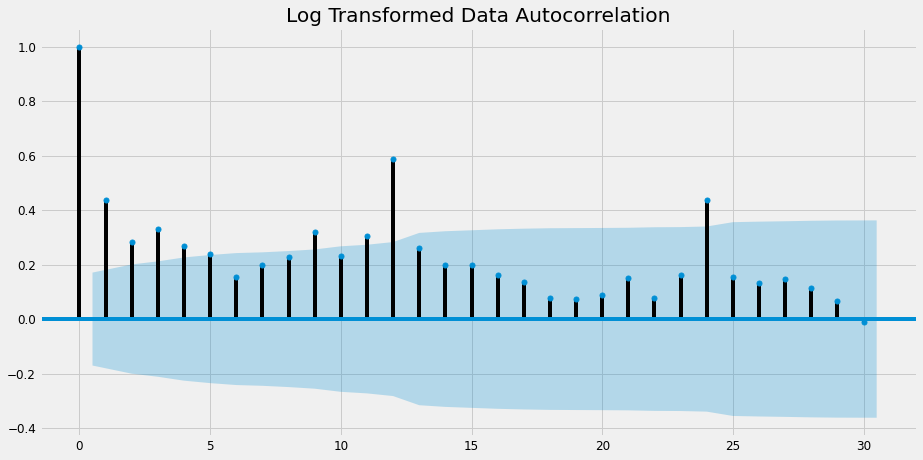

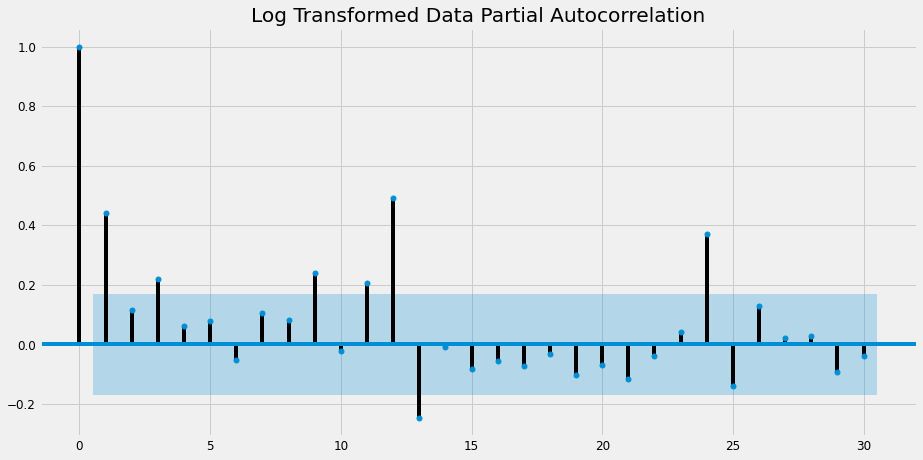

In [307]:
plot_acf(rose_log_train,lags=30,title='Log Transformed Data Autocorrelation')
plot_pacf(rose_log_train,lags=30,title='Log Transformed Data Partial Autocorrelation')
plt.show();

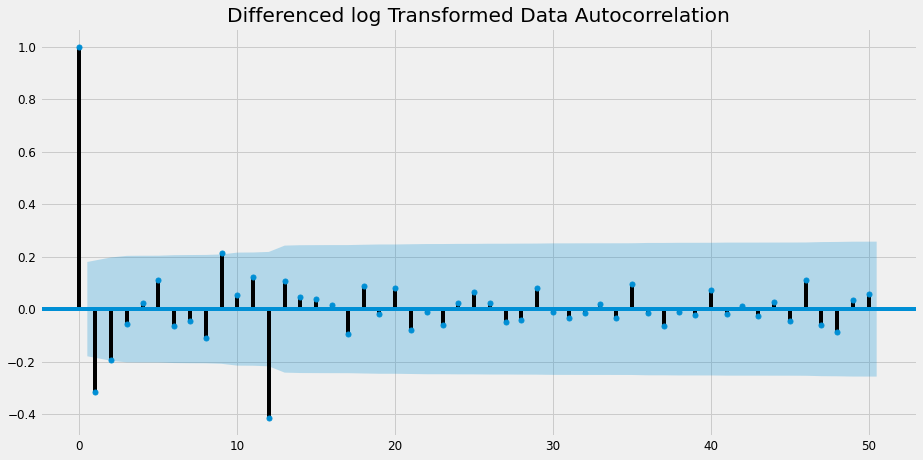

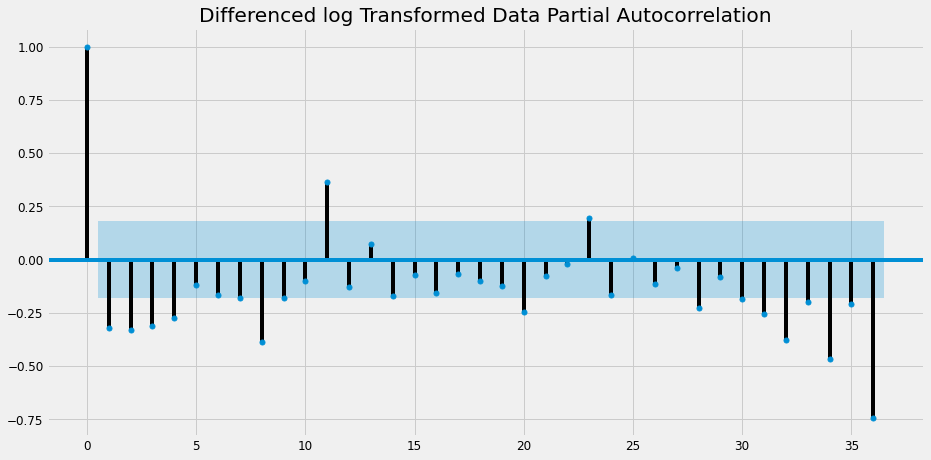

In [308]:
plot_acf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=50,title='Differenced log Transformed Data Autocorrelation')
plot_pacf((rose_log_train.diff(12).dropna()).diff().dropna(),lags=36,title='Differenced log Transformed Data Partial Autocorrelation')
plt.show();

In [309]:
manual_SARIMA_rose_log = sm.tsa.statespace.SARIMAX(rose_log_train,
                                order= (4, 1, 1),
                                seasonal_order= (0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_rose_log = manual_SARIMA_rose_log.fit(maxiter=1000)
print(results_manual_SARIMA_rose_log.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  132
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 128.764
Date:                            Fri, 08 Oct 2021   AIC                           -243.528
Time:                                    07:13:46   BIC                           -224.950
Sample:                                01-31-1980   HQIC                          -236.000
                                     - 12-31-1990                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0013      0.118     -0.011      0.991      -0.232       0.229
ar.L2         -0.1549      0.126   

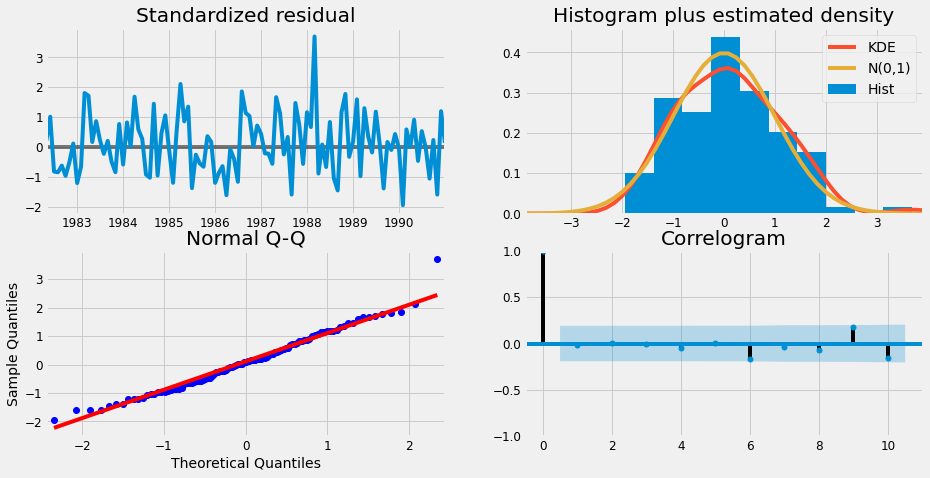

In [310]:
results_manual_SARIMA_rose_log.plot_diagnostics()
plt.show()

In [311]:
pred_dynamic = results_manual_SARIMA_rose_log.get_prediction(dynamic=True, full_results=True)

In [312]:
pred_dynamic_ci = pred_dynamic.conf_int()
predicted_manual_SARIMA_rose_log = results_manual_SARIMA_rose_log.get_forecast(steps=len(test['Rose']), alpha=0.1)

In [313]:
predicted_manual_SARIMA_rose_log.summary_frame(alpha=0.05).head()

Rose            mean   mean_se  mean_ci_lower  mean_ci_upper
1991-01-31  1.721104  0.067180       1.589433       1.852775
1991-02-28  1.789043  0.067984       1.655795       1.922290
1991-03-31  1.811286  0.067982       1.678043       1.944528
1991-04-30  1.786831  0.068004       1.653546       1.920116
1991-05-31  1.820831  0.067848       1.687852       1.953811

In [314]:
SARIMA_test['rose_log_manual_forecasted'] = np.power(10,predicted_manual_SARIMA_rose_log.predicted_mean)
SARIMA_test.head()

Rose  ...  rose_log_manual_forecasted
Time_Stamp        ...                            
1991-01-31  54.0  ...                   52.614317
1991-02-28  55.0  ...                   61.523709
1991-03-31  66.0  ...                   64.756832
1991-04-30  65.0  ...                   61.211239
1991-05-31  60.0  ...                   66.195958

[5 rows x 5 columns]

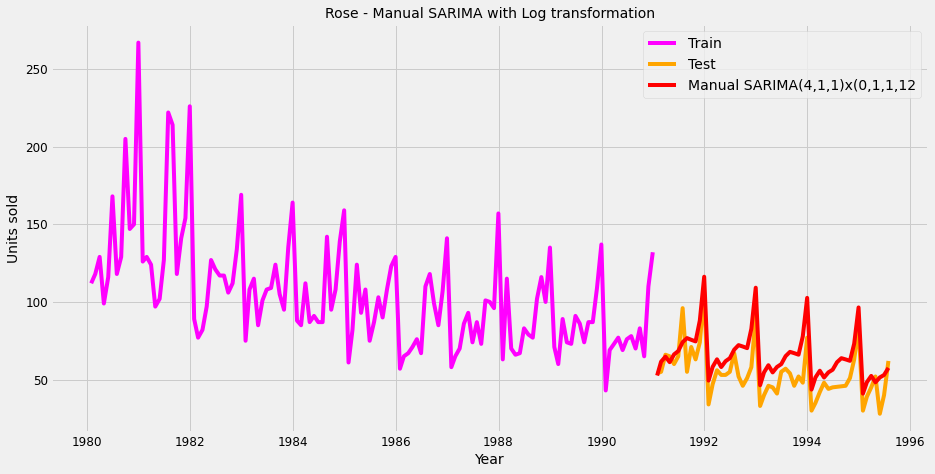

In [315]:
plt.plot(train['Rose'], label='Train', color = 'magenta')
plt.plot(test['Rose'], label='Test', color = 'orange')

plt.plot(SARIMA_test['rose_log_manual_forecasted'], color='red', label='Manual SARIMA(4,1,1)x(0,1,1,12')
plt.xlabel('Year')
plt.ylabel('Units sold')
plt.title('Rose - Manual SARIMA with Log transformation', fontsize=14)

plt.legend(loc='best');

In [316]:
rmse_rose_model8_test = metrics.mean_squared_error(test['Rose'],SARIMA_test['rose_log_manual_forecasted'],squared=False)
mape_rose_model8_test = MAPE(test['Rose'],SARIMA_test['rose_log_manual_forecasted'])
print("For SARIMA forecast on the Rose Testing Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_model8_test, mape_rose_model8_test))

For SARIMA forecast on the Rose Testing Data:  RMSE is 14.176 and MAPE is 23.10


In [317]:
resultsDf_8_rose4 = pd.DataFrame({'Test RMSE': [rmse_rose_model8_test],'Test MAPE': [mape_rose_model8_test]},index=['Manual SARIMA(4,1,1)x(0,1,1,12)-Log10'])

rose_resultsDf = pd.concat([rose_resultsDf, resultsDf_8_rose4])
rose_resultsDf

Test RMSE  Test MAPE
RegressionOnTime                       15.268885      22.82
NaiveModel                             79.718559     145.10
SimpleAverage                          53.460350      94.93
2 point TMA                            11.529278      13.54
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
SES Alpha 0.01                         36.796022      63.88
DES Alpha 0.16, Beta 0.16              70.572197     120.25
DES Alpha 0.10, Beta 0.10              37.056911      64.02
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369211      28.88
Auto SARIMA(3,1,1)x(3,1,1,12)          16.822203      25.48
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.589879      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.176466      23.10

**Building the most optimum model on the Full Data.**

In [318]:
rose_resultsDf.sort_values(by=['Test RMSE'])

Test RMSE  Test MAPE
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
2 point TMA                            11.529278      13.54
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.589879      21.92
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.176466      23.10
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
Auto SARIMA(3,1,1)x(3,1,1,12)          16.822203      25.48
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369211      28.88
SES Alpha 0.01                         36.796022      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
DES Alpha 0.16, Beta 0.16              70.572197     120.25
NaiveModel                             79.718559     145.10

In [319]:
rose_resultsDf.sort_values(by=['Test MAPE'])

Test RMSE  Test MAPE
2 point TMA                            11.529278      13.54
TES Alpha 0.1, Beta 0.2, Gamma 0.2      9.640616      13.96
4 point TMA                            14.451364      19.49
6 point TMA                            14.566269      20.82
9 point TMA                            14.727594      21.01
Auto SARIMA(1,0,0)x(1,0,1,12)-Log10    13.589879      21.92
Manual SARIMA(4,1,2)x(0,1,1,12)        15.377144      22.16
RegressionOnTime                       15.268885      22.82
Manual SARIMA(4,1,1)x(0,1,1,12)-Log10  14.176466      23.10
Auto SARIMA(3,1,1)x(3,1,1,12)          16.822203      25.48
TES Alpha 0.11, Beta 0.05, Gamma 0.00  17.369211      28.88
SES Alpha 0.01                         36.796022      63.88
DES Alpha 0.10, Beta 0.10              37.056911      64.02
SimpleAverage                          53.460350      94.93
DES Alpha 0.16, Beta 0.16              70.572197     120.25
NaiveModel                             79.718559     145.10

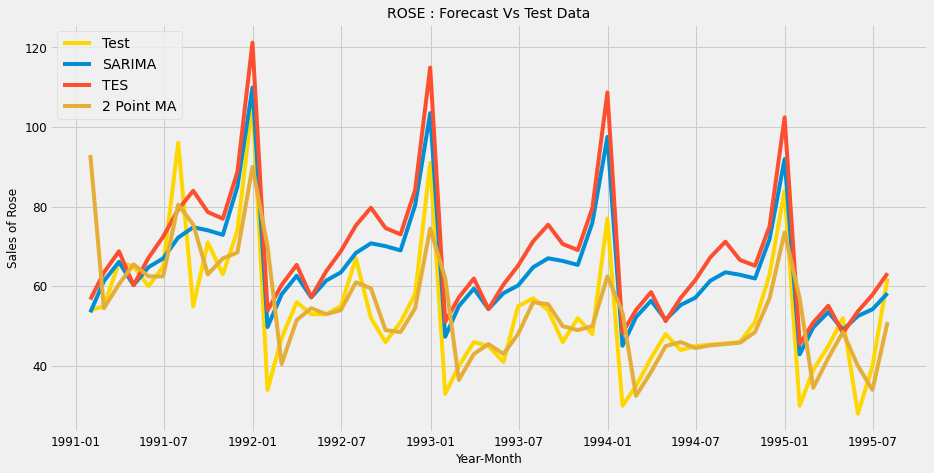

In [320]:
plt.plot(TES_test['Rose'], label='Test', color = 'gold')

#SARIMA
plt.plot(SARIMA_test['rose_log_auto_forecasted'],  label='SARIMA')
#TES
plt.plot(TES_test['predict_rose',alpha_7_2,beta_7_2,gamma_7_2],  label='TES')
#DES
#plt.plot(DES_test['predict_rose',0.1,0.1],  label='DES')
#SES
#plt.plot(SES_test['predict_rose'],  label='SES')
#MA
plt.plot(trailing_MovingAverage_test['Rose_Trailing_2'],  label='2 Point MA')
#SA
#plt.plot(SimpleAverage_test['rose_mean_forecast'], label='SA')
#Naive
#plt.plot(NaiveModel_test['rose_naive'], label='Naive')
#Regression
#plt.plot(LinearRegression_test['RegOnTime_rose'], label='Regression')

plt.legend(loc='upper left')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : Forecast Vs Test Data', fontsize=14);

**Build TES Model on Rose full data**

In [321]:
model_TES_rose = ExponentialSmoothing(df['Rose'],trend='additive',seasonal='multiplicative',freq='M')
model_TES_rose_fit = model_TES_rose.fit(smoothing_level=0.1,smoothing_slope=0.2,smoothing_seasonal=0.2,optimized=True,use_brute=True)
TES_rose_forecast = model_TES_rose_fit.forecast(steps=12)

In [322]:
rmse_rose_tes_full = metrics.mean_squared_error(df['Rose'],model_TES_rose_fit.fittedvalues,squared=False)
mape_rose_tes_full = MAPE(df['Rose'],model_TES_rose_fit.fittedvalues)
print("TES forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_tes_full, mape_rose_tes_full))

TES forecast on the Rose Full Data:  RMSE is 20.881 and MAPE is 14.48


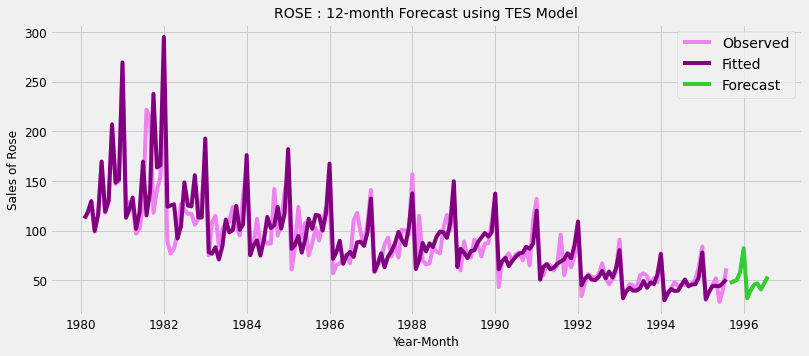

In [323]:
plt.figure(figsize=(12,5))

plt.plot(df['Rose'], label='Observed', color = 'violet')
plt.plot(model_TES_rose_fit.fittedvalues, label='Fitted', color = 'purple')
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')

plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12-month Forecast using TES Model', fontsize=14)

plt.legend(loc='best')
plt.show()

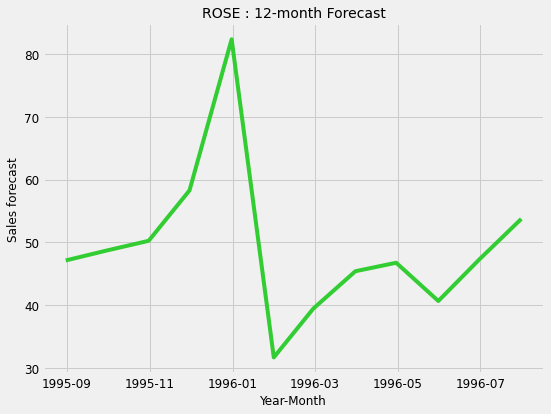

In [324]:
plt.figure(figsize=(8,6))
plt.plot(TES_rose_forecast, label='Forecast', color = 'limegreen')
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales forecast',fontsize=12)
plt.title('ROSE : 12-month Forecast', fontsize=14);

**Trying SARIMAX**

In [325]:
rose_log_trans = np.log10(df['Rose'])

In [326]:
rose_full_data_model = sm.tsa.statespace.SARIMAX(df['Rose'],#rose_log_trans.values,
                                order= (4,1,1), #(1,0,0), #(4,1,1)x(0,1,1,12)
                                seasonal_order= (0,1,1,12), #(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model_rose = rose_full_data_model.fit(maxiter=1000)
print(results_full_data_model_rose.summary())

                                 Statespace Model Results                                 
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(4, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -664.135
Date:                            Fri, 08 Oct 2021   AIC                           1342.270
Time:                                    07:13:49   BIC                           1363.796
Sample:                                01-31-1980   HQIC                          1351.011
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0914      0.084      1.093      0.274      -0.072       0.255
ar.L2         -0.1077      0.077   

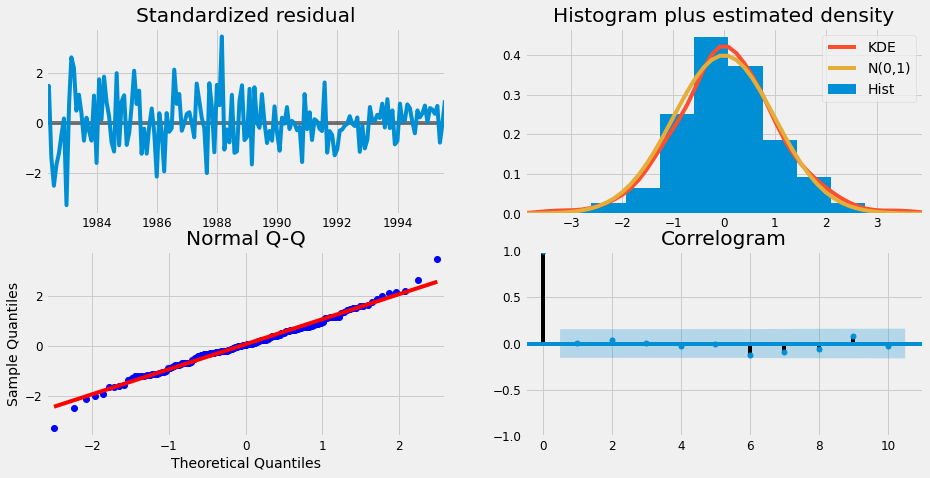

In [327]:
results_full_data_model_rose.plot_diagnostics();

In [328]:
predicted_rose_SARIMA_full_data = results_full_data_model_rose.get_forecast(steps=12)
predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  46.540808  15.245485      16.660206      76.421410
1995-09-30  45.514601  15.769107      14.607720      76.421483
1995-10-31  46.226234  15.827871      15.204177      77.248291
1995-11-30  54.319829  15.831175      23.291297      85.348362
1995-12-31  82.214863  15.835193      51.178456     113.251271

In [329]:
rmse_rose_sarima_full = metrics.mean_squared_error(df['Rose'],results_full_data_model_rose.fittedvalues,squared=False)
mape_rose_sarima_full = MAPE(df['Rose'],results_full_data_model_rose.fittedvalues)

print("For SARIMA forecast on the Rose Full Data:  RMSE is %3.3f and MAPE is %3.2f" %(rmse_rose_sarima_full, mape_rose_sarima_full))

For SARIMA forecast on the Rose Full Data:  RMSE is 30.676 and MAPE is 19.40


In [330]:
pred_full_manual_SARIMA_date = predicted_rose_SARIMA_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-08-31',end='1996-7-31', freq='M'))

In [331]:
results_full_data_model_rose.fittedvalues.head()

Time_Stamp
1980-01-31      0.000000
1980-02-29    115.410430
1980-03-31    114.398803
1980-04-30    123.947737
1980-05-31     92.219741
dtype: float64

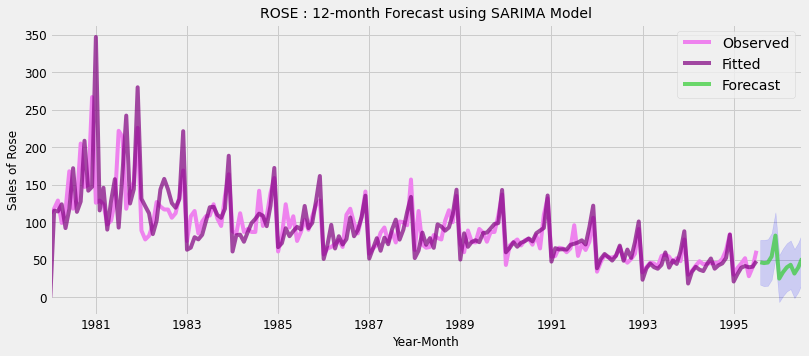

In [332]:
plt.figure(figsize=(12,5))

axis = df['Rose'].plot(label='Observed', color = 'violet')

#np.power(10,results_full_data_model_rose.fittedvalues).plot(label='Fitted', alpha=0.7, color = 'crimson')
#np.power(10,pred_full_manual_SARIMA_date['mean']).plot(ax=axis, label='Forecast', alpha=0.7, color = 'orangered')

results_full_data_model_rose.fittedvalues.plot(label='Fitted', alpha=0.7, color = 'purple')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7, color = 'limegreen')

axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Month',fontsize=12)
plt.ylabel('Sales of Rose',fontsize=12)
plt.title('ROSE : 12-month Forecast using SARIMA Model', fontsize=14)

plt.legend(loc='best')
plt.show();

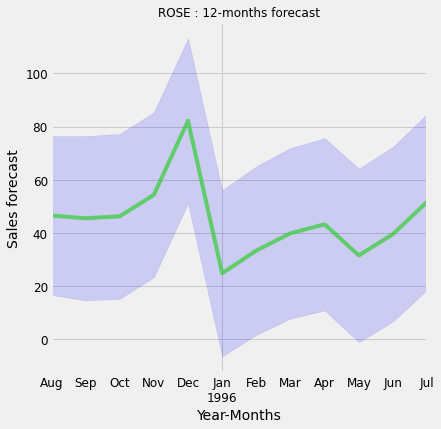

In [333]:
plt.figure(figsize=(6,6))
axis = pred_full_manual_SARIMA_date['mean'].plot( alpha=0.7, color = 'limegreen')
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='blue', alpha=.15)
plt.xlabel('Year-Months')
plt.ylabel('Sales forecast')
plt.title('ROSE : 12-months forecast', fontsize=12);

In [334]:
forecast2 = pd.DataFrame({'ROSE':np.round(pred_full_manual_SARIMA_date['mean'],2)})
forecast2

ROSE
1995-08-31  46.54
1995-09-30  45.51
1995-10-31  46.23
1995-11-30  54.32
1995-12-31  82.21
1996-01-31  24.81
1996-02-29  33.35
1996-03-31  39.87
1996-04-30  43.23
1996-05-31  31.53
1996-06-30  39.56
1996-07-31  51.70

In [335]:
forecast2.describe()

ROSE
count  12.000000
mean   44.905000
std    14.473222
min    24.810000
25%    38.007500
50%    44.370000
75%    47.830000
max    82.210000

In [336]:
forecast2.sum()

ROSE    538.86
dtype: float64